# Customer Churn Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cust_churn = pd.read_csv('/content/drive/MyDrive/AI/AI- customer churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AI/AI- customer churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
cust_churn = pd.read_csv('/content/drive/MyDrive/BACS 3074 Artificial Intelligence/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# EDA

In [ ]:
cust_churn.shape

(7043, 21)

In [ ]:
cust_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
cust_churn.TotalCharges = pd.to_numeric(cust_churn.TotalCharges, errors='coerce')
cust_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
cust_churn.TotalCharges.fillna(0,  inplace = True)
cust_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Gender, SeniorCitizen, Partner, Dependents

In [ ]:
def plot_distribution(df, columns):

    for column in columns:
        plt.figure(figsize=(6, 4))
        # Calculate percentage distribution
        percentage_distribution = df[column].value_counts(normalize=True) * 100
        sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, hue=percentage_distribution.index, palette=['skyblue', 'salmon'], dodge=False)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)
        plt.legend([], frameon=False)  # Remove legend
        plt.show()

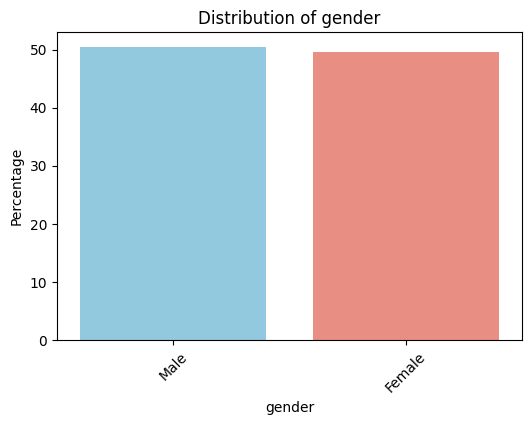

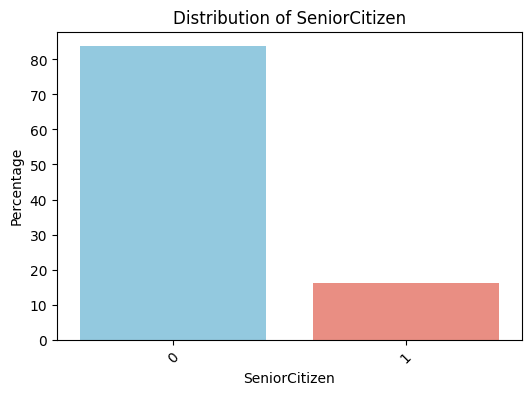

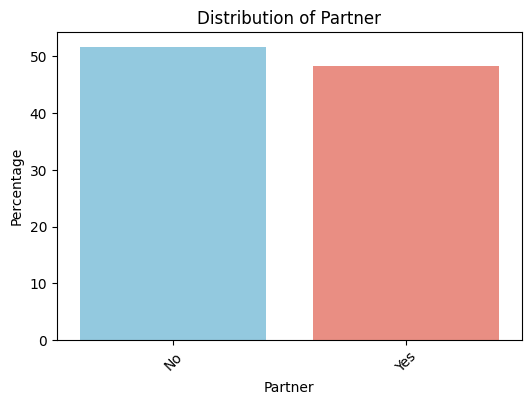

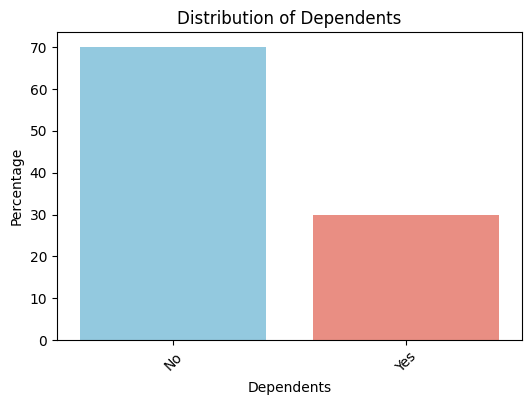

In [ ]:
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
plot_distribution(cust_churn, columns_to_plot)

In [ ]:
def stacked_plot(df, group, target):

  fig, ax = plt.subplots(figsize=(6, 4))

  # Calculate percentage of each target category within each group
  temp_df = (df.groupby([group, target]).size() / df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
  temp_df = temp_df.div(temp_df.sum(axis=1), axis=0) * 100  # Convert counts to percentages

  # Plot the stacked bar chart
  temp_df.plot(kind='bar', stacked=True, ax=ax)

  # Add data labels with percentages on top of each bar
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f"{height:.1f}%", (x + 0.25 * width, y + 0.4 * height),
                color='white',
                weight='bold',
                size=12)  # Adjust label size as needed

  # Set labels and formatting
  ax.xaxis.set_tick_params(rotation=0)
  ax.set_xlabel(group)
  ax.set_ylabel('Percentage')  # Update label to reflect percentages
  ax.yaxis.set_major_formatter(mtick.PercentFormatter())  # Format y-axis as percentages
  plt.tight_layout()
  plt.show()


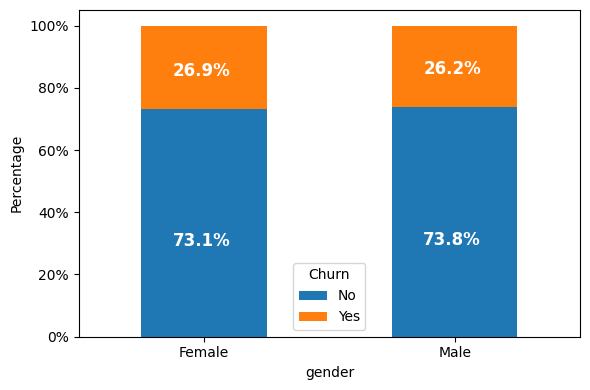

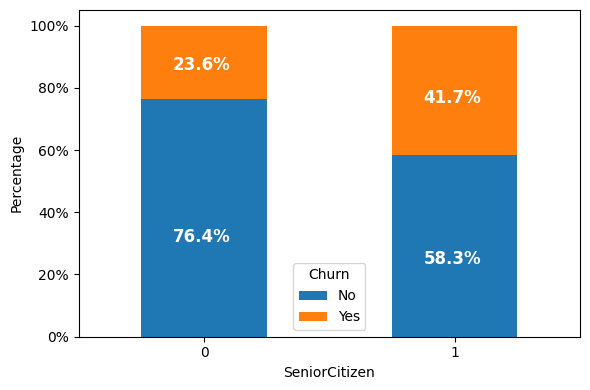

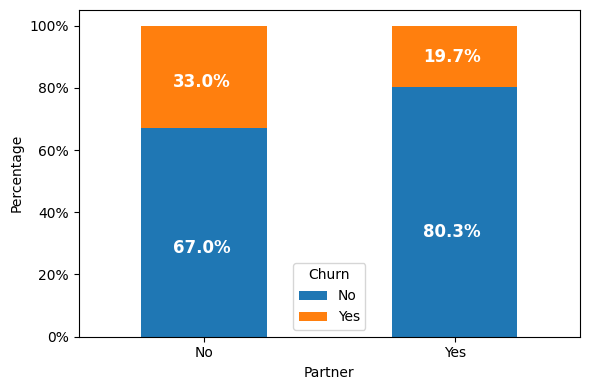

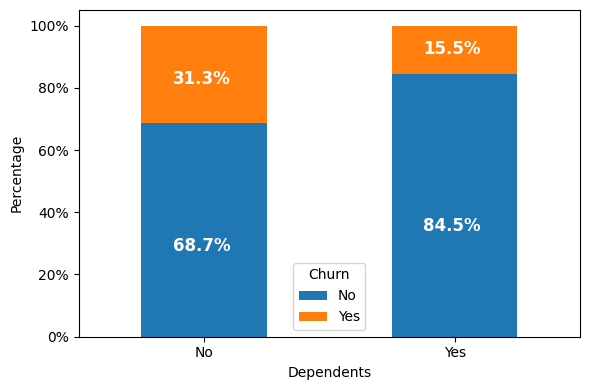

In [ ]:
stacked_plot(cust_churn, "gender", "Churn")
stacked_plot(cust_churn, "SeniorCitizen", "Churn")
stacked_plot(cust_churn, "Partner", "Churn")
stacked_plot(cust_churn, "Dependents", "Churn")

## Tenure

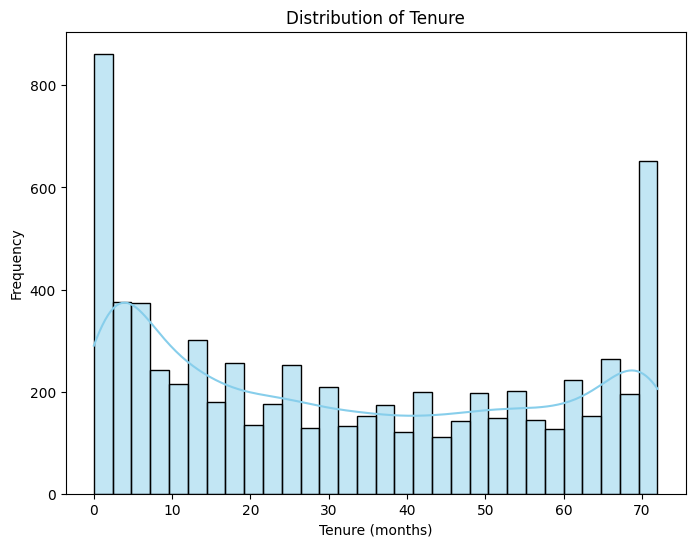

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(cust_churn['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

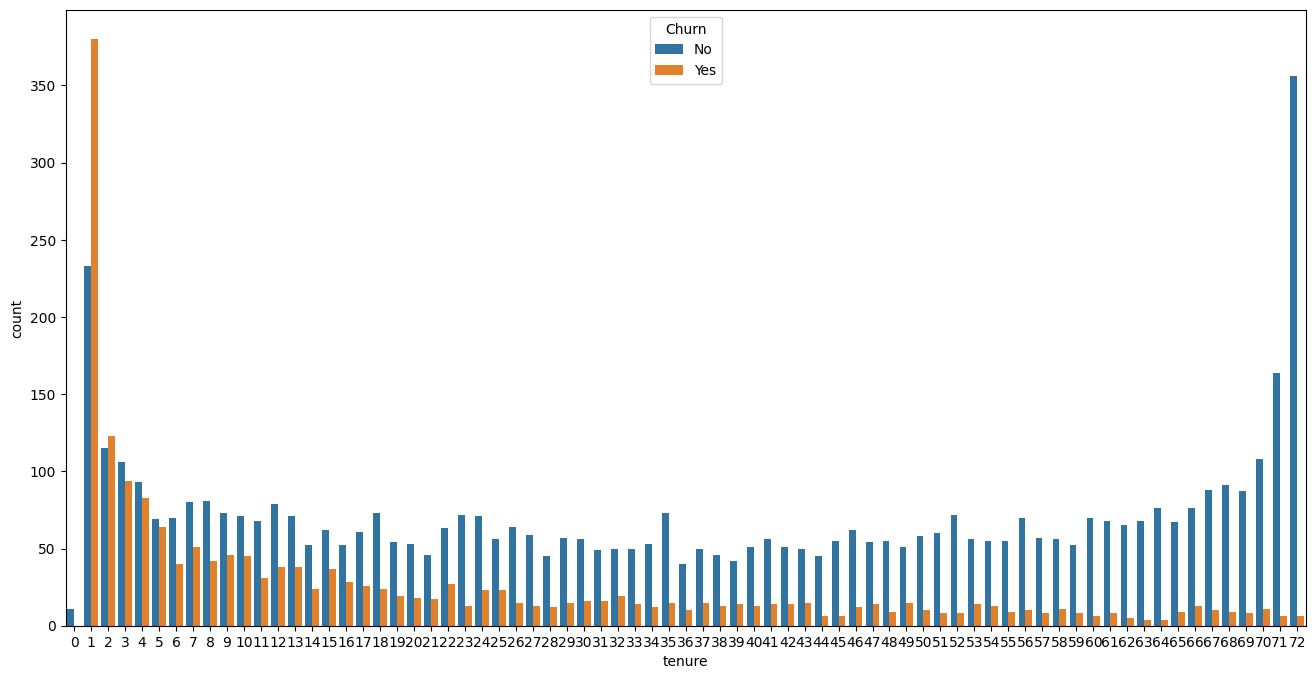

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=cust_churn)
plt.show()

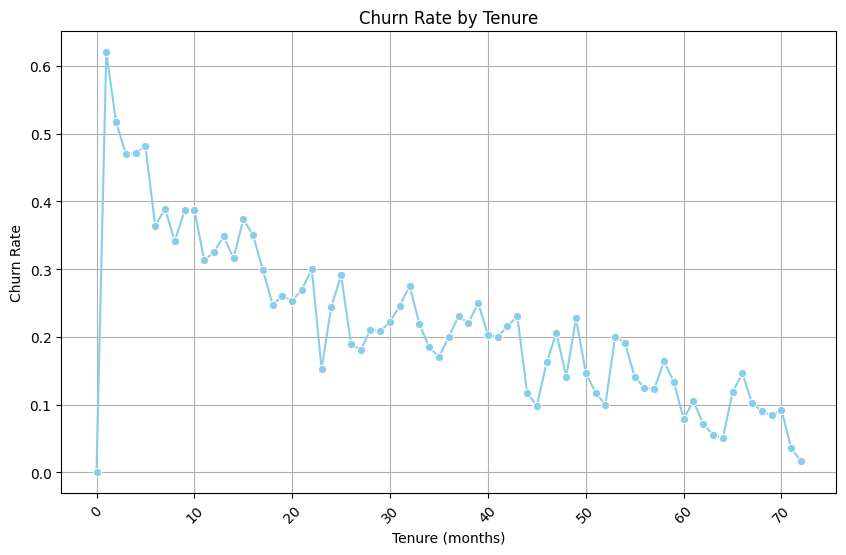

In [ ]:
cust_churn['Churn'] = cust_churn['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rate for each tenure
churn_rate_by_tenure = cust_churn.groupby('tenure')['Churn'].mean()

# Plot the churn rate against tenure
plt.figure(figsize=(10, 6))
sns.lineplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values, marker='o', color='skyblue')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Services

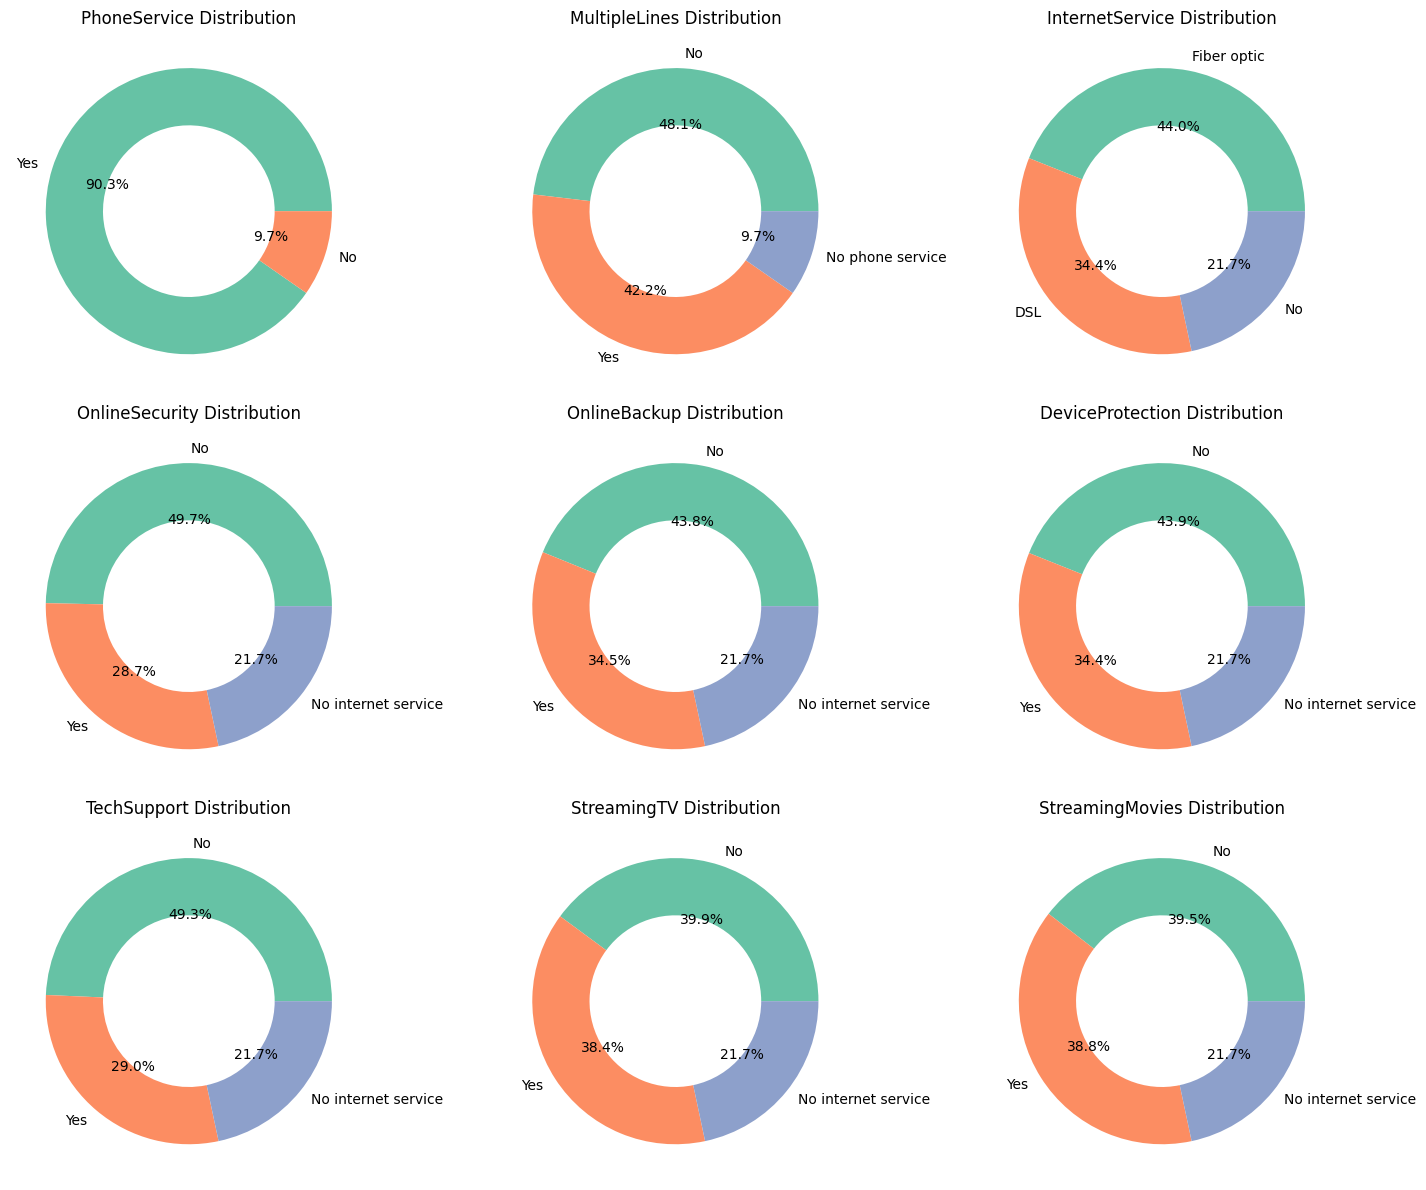

In [ ]:
def draw_donut_chart(df, column, ax):
    distribution = df[column].value_counts()
    colors = sns.color_palette('Set2', len(distribution))
    ax.pie(distribution, labels=distribution.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.4))
    ax.set_title(f'{column} Distribution')

services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine the number of rows and columns for subplots
num_services = len(services)
num_cols = 3
num_rows = (num_services + num_cols - 1) // num_cols

# Create subplots dynamically
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()

# Draw donut charts
for i, item in enumerate(services):
    if i < num_services:
        draw_donut_chart(cust_churn, item, axes[i])
    else:
        # Hide the extra subplots if there are fewer services than subplots
        axes[i].axis('off')

plt.tight_layout()
plt.show()

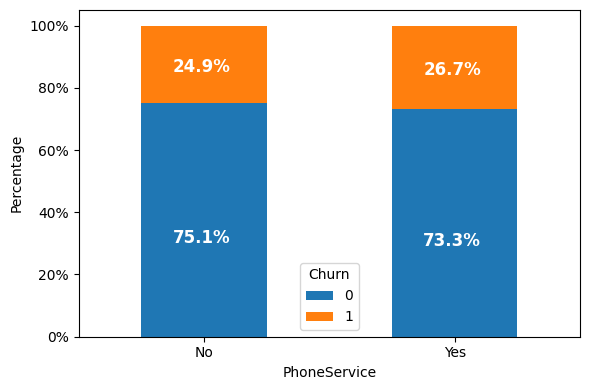

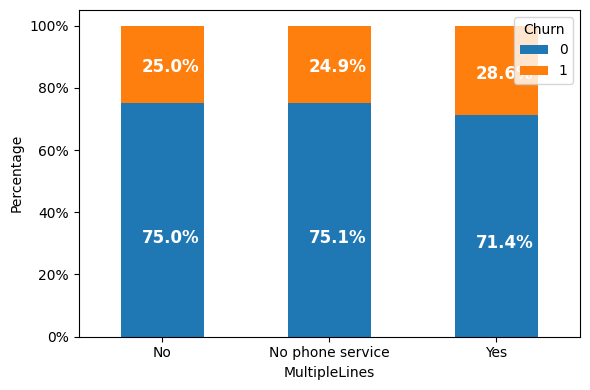

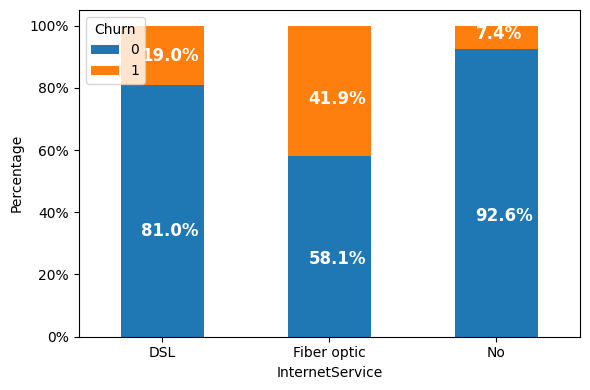

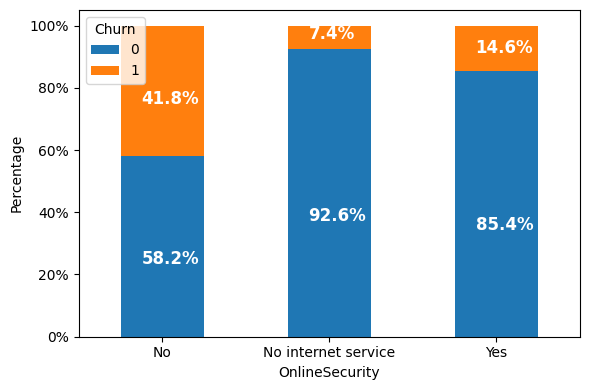

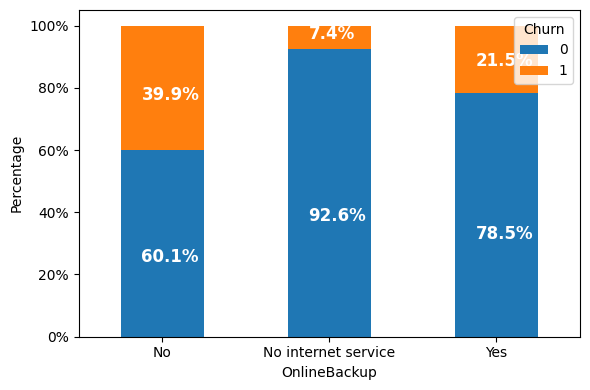

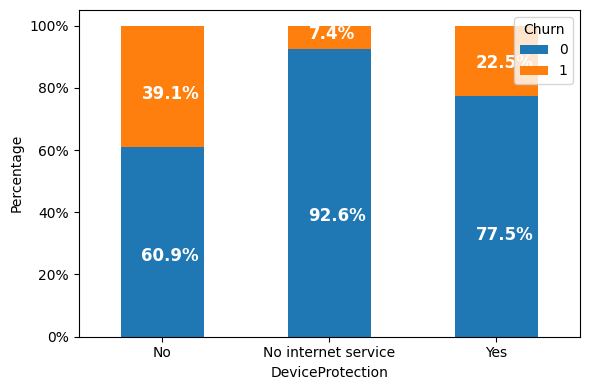

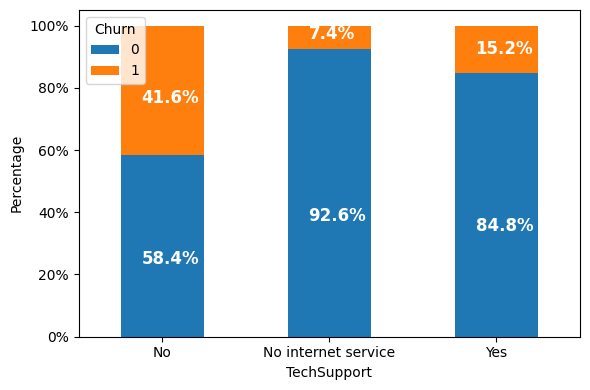

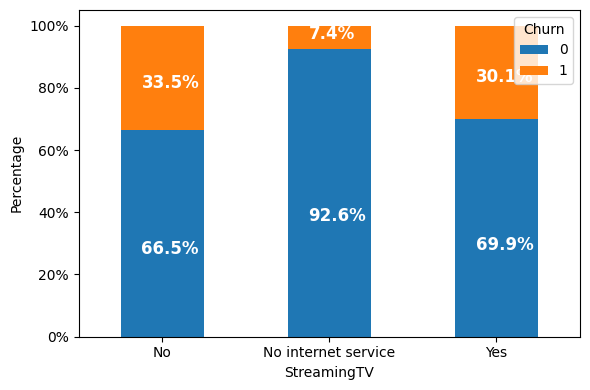

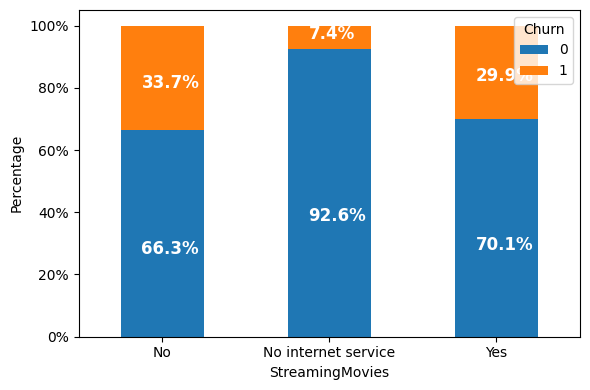

In [ ]:
stacked_plot(cust_churn, "PhoneService", "Churn")
stacked_plot(cust_churn, "MultipleLines", "Churn")
stacked_plot(cust_churn, "InternetService", "Churn")
stacked_plot(cust_churn, "OnlineSecurity", "Churn")
stacked_plot(cust_churn, "OnlineBackup", "Churn")
stacked_plot(cust_churn, "DeviceProtection", "Churn")
stacked_plot(cust_churn, "TechSupport", "Churn")
stacked_plot(cust_churn, "StreamingTV", "Churn")
stacked_plot(cust_churn, "StreamingMovies", "Churn")

## Contract

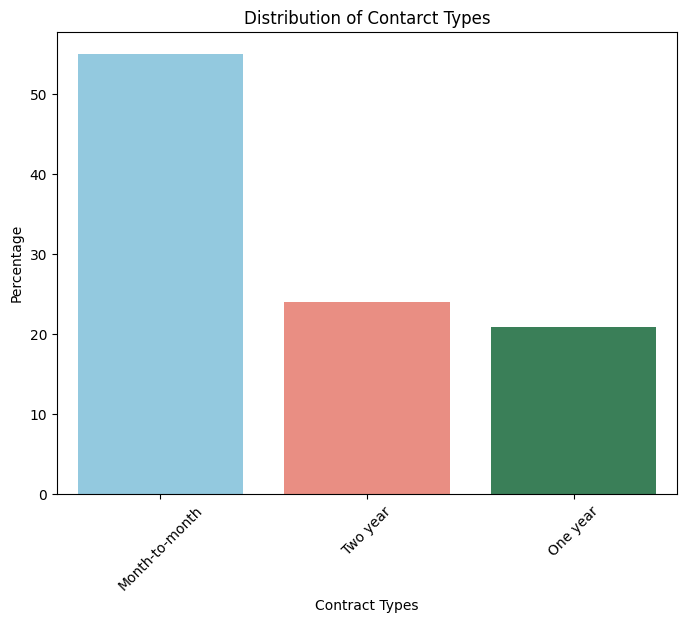

In [ ]:
plt.figure(figsize=(8, 6))
percentage_distribution = cust_churn['Contract'].value_counts(normalize=True) * 100
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, hue=percentage_distribution.index, palette=['skyblue', 'salmon', 'seagreen'], dodge=False)
plt.title(f'Distribution of Contarct Types')
plt.xlabel('Contract Types')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend([], frameon=False)  # Remove legend
plt.show()

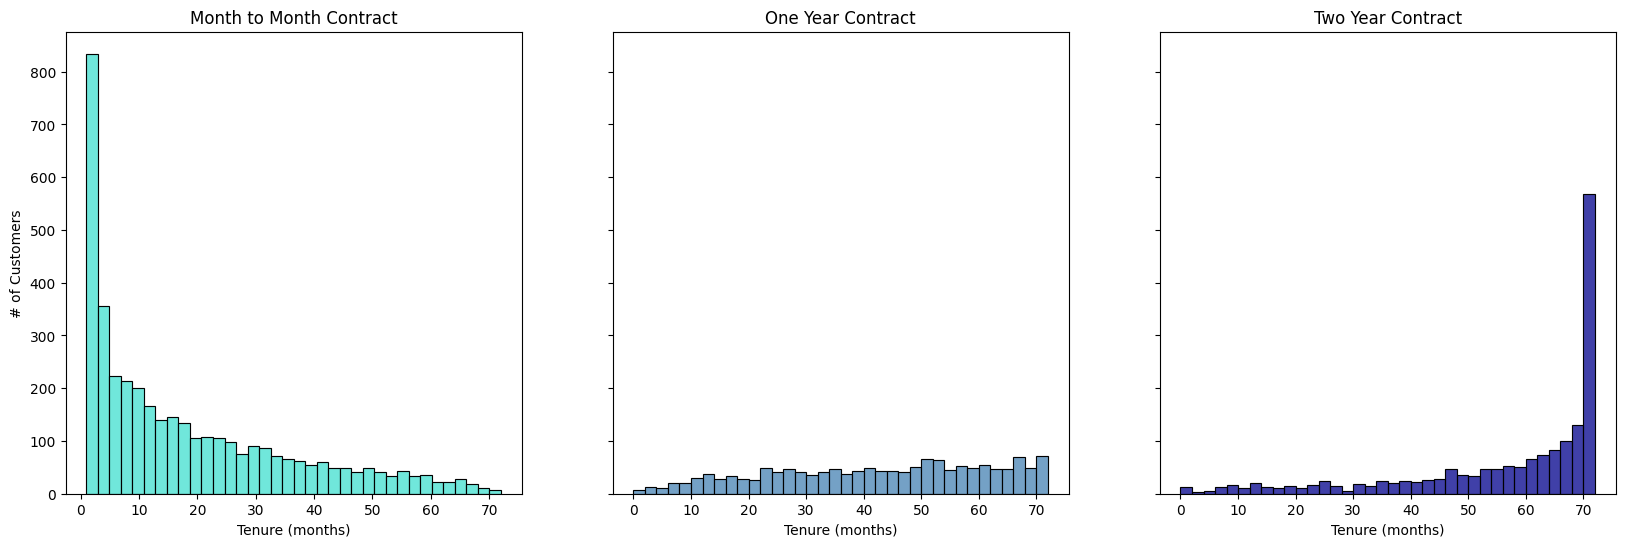

In [ ]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plot for Month-to-Month cust_churn
sns.histplot(data=cust_churn[cust_churn['Contract'] == 'Month-to-month'],
             x='tenure', bins=int(180/5), color='turquoise',
             edgecolor='black', ax=ax1)
ax1.set_ylabel('# of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

# Plot for One Year Contract
sns.histplot(data=cust_churn[cust_churn['Contract'] == 'One year'],
             x='tenure', bins=int(180/5), color='steelblue',
             edgecolor='black', ax=ax2)
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

# Plot for Two Year Contract
sns.histplot(data=cust_churn[cust_churn['Contract'] == 'Two year'],
             x='tenure', bins=int(180/5), color='darkblue',
             edgecolor='black', ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

plt.show()

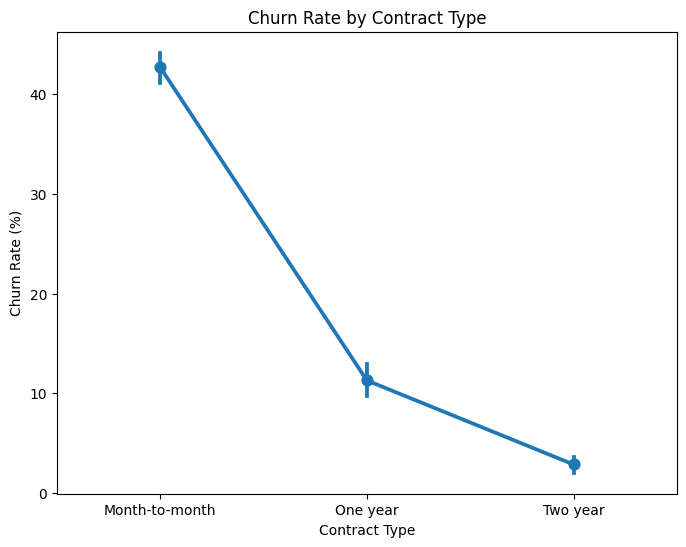

In [ ]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=cust_churn, x='Contract', y='Churn', estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.show()

## Payment method

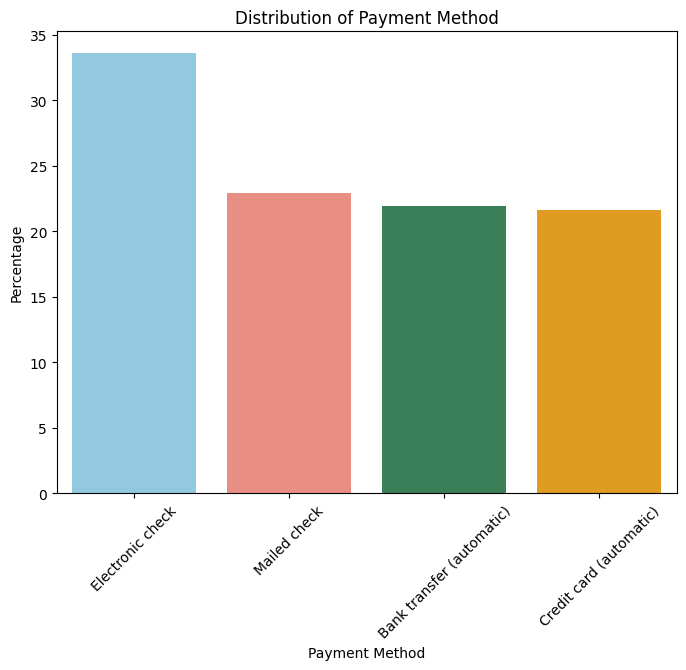

In [ ]:
plt.figure(figsize=(8, 6))
percentage_distribution = cust_churn['PaymentMethod'].value_counts(normalize=True) * 100
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, hue=percentage_distribution.index, palette=['skyblue', 'salmon', 'seagreen', 'orange'], dodge=False)
plt.title(f'Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend([], frameon=False)  # Remove legend
plt.show()

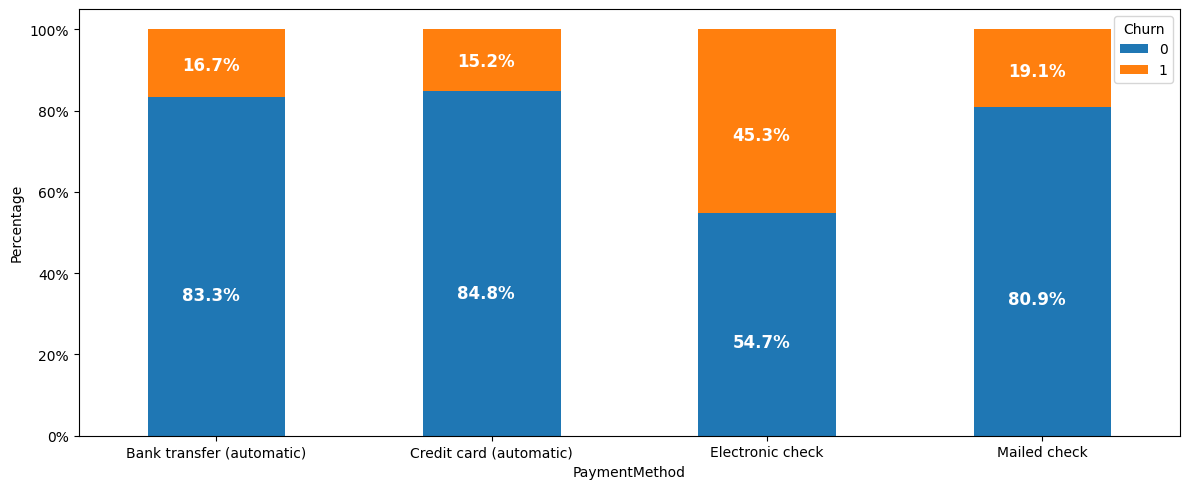

In [ ]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (cust_churn.groupby([group, target]).size()/cust_churn.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df = temp_df.div(temp_df.sum(axis=1), axis=0) * 100
temp_df.plot(kind='bar', stacked=True, ax = ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f"{height:.1f}%", (x + 0.25 * width, y + 0.4 * height),
                color='white',
                weight='bold',
                size=12)  # Adjust label size as needed

# Set labels and formatting
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Percentage')  # Update label to reflect percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())  # Format y-axis as percentages
plt.tight_layout()
plt.show()

## Paperless billing

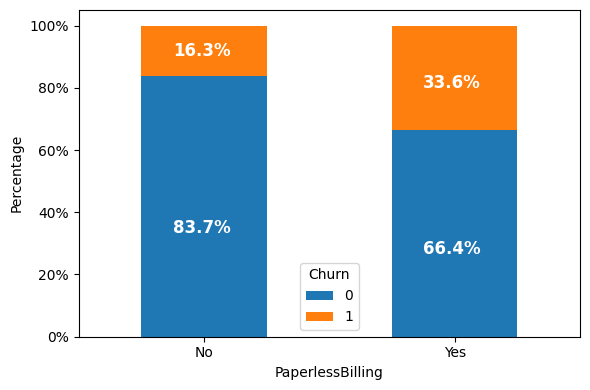

In [ ]:
stacked_plot(cust_churn, "PaperlessBilling", "Churn")

## Monthly charges

In [ ]:
cust_churn['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

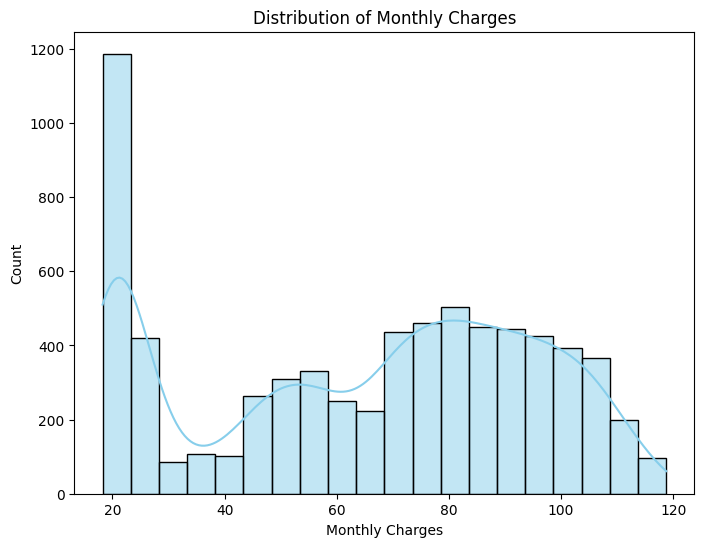

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=cust_churn, x='MonthlyCharges', bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

In [ ]:
cust_churn['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

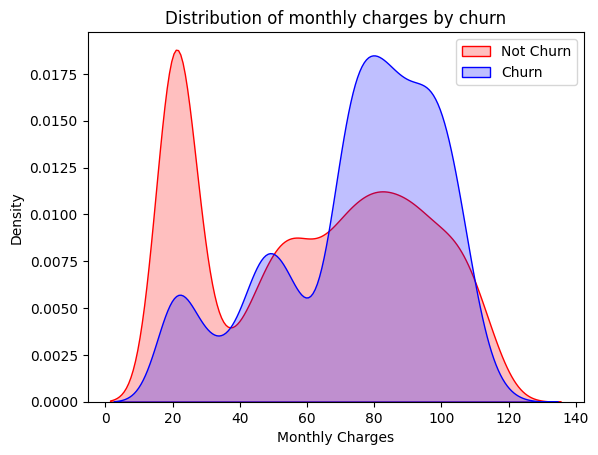

In [ ]:
ax = sns.kdeplot(cust_churn.MonthlyCharges[(cust_churn["Churn"] == 0) ],
                 color="Red", fill=True)
ax = sns.kdeplot(cust_churn.MonthlyCharges[(cust_churn["Churn"] == 1) ],
                 ax=ax, color="Blue", fill=True)
ax.legend(["Not Churn","Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

## Total charges

In [ ]:
cust_churn['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

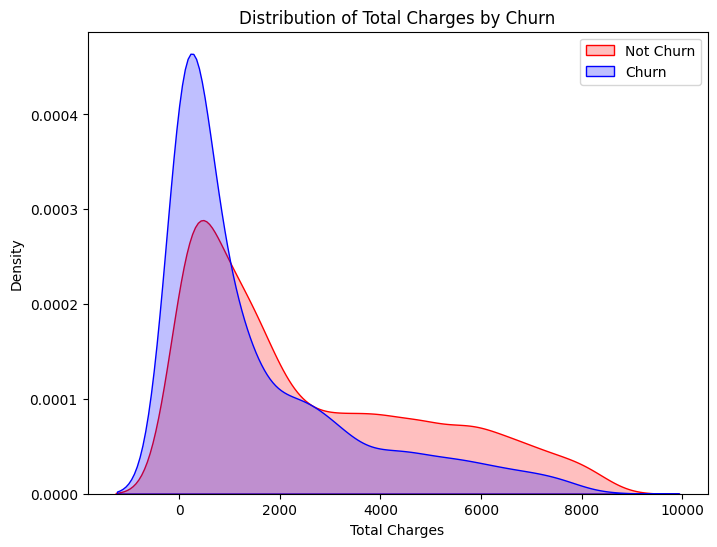

In [ ]:
cust_churn['TotalCharges'] = pd.to_numeric(cust_churn['TotalCharges'], errors='coerce')

plt.figure(figsize=(8, 6))
ax = sns.kdeplot(cust_churn.TotalCharges[cust_churn["Churn"] == 0],
                 color="Red", fill=True)
ax = sns.kdeplot(cust_churn.TotalCharges[cust_churn["Churn"] == 1],
                 ax=ax, color="Blue", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
plt.show()

## Churn

0    5174
1    1869
Name: Churn, dtype: int64


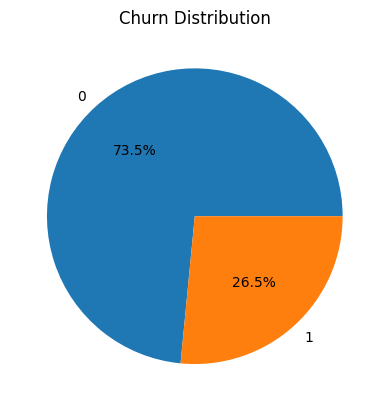

In [ ]:
# Assuming your data is loaded into a pandas dataframe called df
churn_counts = cust_churn['Churn'].value_counts()
print(churn_counts)

# You can also visualize this using pie charts or bar charts
import matplotlib.pyplot as plt

plt.pie(churn_counts.values, labels=churn_counts.index, autopct="%1.1f%%")
plt.title("Churn Distribution")
plt.show()

##Correlation

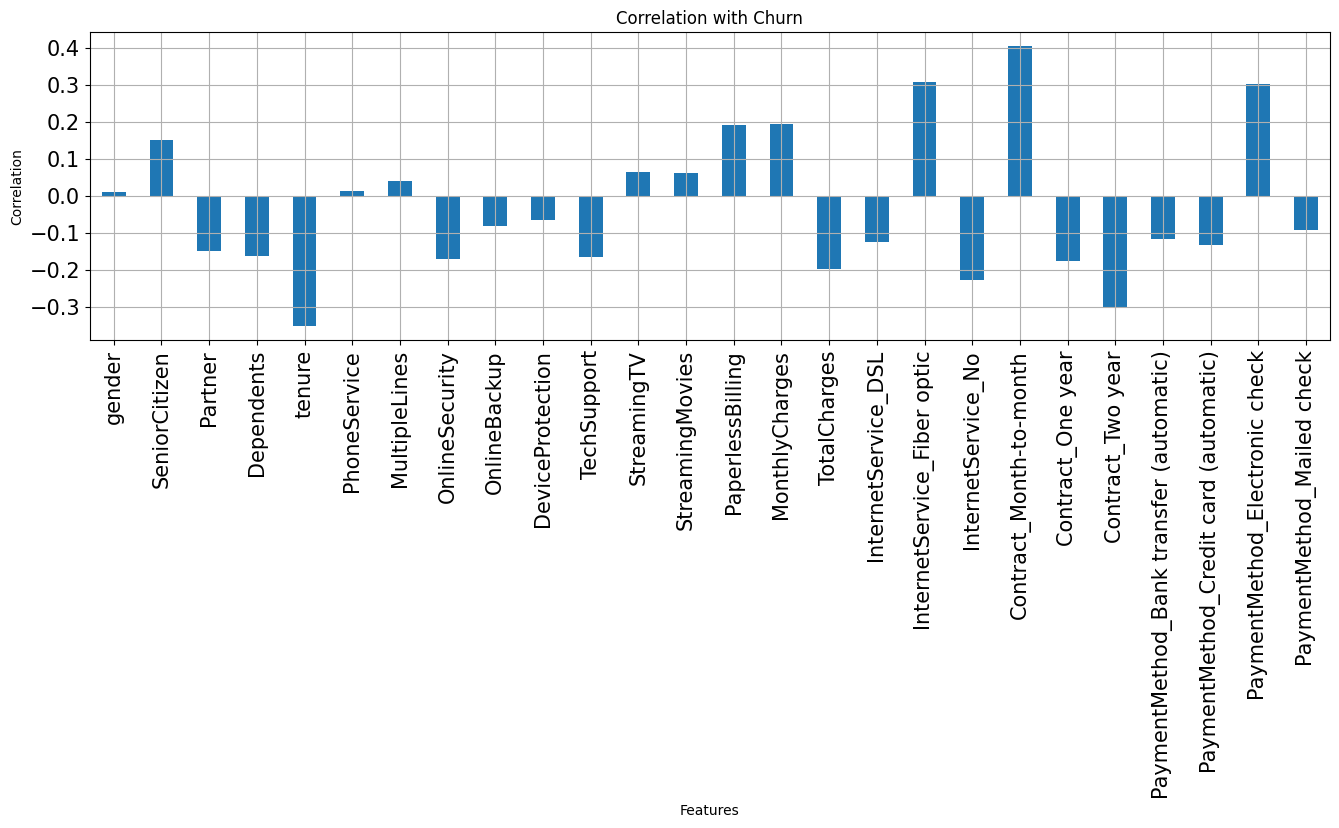

In [ ]:
correlation_with_churn = df.drop(columns=['Churn']).corrwith(df['Churn'])
correlation_with_churn.plot.bar(figsize=(16, 4), title="Correlation with Churn", fontsize=15, rot=90, grid=True)
plt.xlabel("Features")
plt.ylabel("Correlation")

plt.show()

# Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BACS 3074 Artificial Intelligence/WA_Fn-UseC_-Telco-Customer-Churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/BACS 3074 Artificial Intelligence/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI/AI- customer churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#df = cust_churn

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df["TotalCharges"].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [ ]:
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0
df.isnull().any().any()

False

In [ ]:
df.drop(["customerID"], inplace = True, axis = 1)

In [ ]:
df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)

columns = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
for col in columns:
  df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

columns2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns2:
    df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

In [ ]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
columns = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No','Contract_Month-to-month', 'Contract_One year',
           'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
           'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Apply a lambda function to convert 'True' to 1 and 'False' to 0 for each column
for col in columns:
    df[col] = df[col].apply(lambda x: 1 if x == True else 0)

In [ ]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 27 columns]

In [ ]:
df.isnull().any().any()

False

## Sampling

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Churn'])
y = df['Churn']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df_upsampled = pd.DataFrame(X_resampled, columns=X.columns)
df_upsampled['Churn'] = y_resampled

print("Before upsampling:")
print(y.value_counts())
print("\nAfter upsampling:")
print(y_resampled.value_counts())

Before upsampling:
Churn
0    5174
1    1869
Name: count, dtype: int64

After upsampling:
Churn
0    5174
1    5174
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

df_downsampled = pd.DataFrame(X_resampled, columns=X.columns)
df_downsampled['Churn'] = y_resampled

print("Before downsampling:")
print(y.value_counts())
print("\nAfter downsampling:")
print(y_resampled.value_counts())


Before downsampling:
Churn
0    5174
1    1869
Name: count, dtype: int64

After downsampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


## Feature-scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_normalized = df.copy()
df_standardized = df.copy()

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Perform Min-Max scaling on tenure, MonthlyCharges, and TotalCharges for the normalized dataframe
df_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']] = min_max_scaler.fit_transform(
df_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Perform Standardization on tenure, MonthlyCharges, and TotalCharges for the standardized dataframe
df_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']] = standard_scaler.fit_transform(
df_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']])

min_val_normalized = df_normalized.min()
min_val_standardized = df_standardized.min()

df_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']] += abs(min_val_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']])
df_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']] += abs(min_val_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Print the first few rows of the normalized dataframe
print("Normalized DataFrame:")
print(df_normalized.head())

# Print the first few rows of the standardized dataframe
print("\nStandardized DataFrame:")
print(df_standardized.head())


Normalized DataFrame:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           0  0.013889             0   
1       0              0        0           0  0.472222             1   
2       0              0        0           0  0.027778             1   
3       0              0        0           0  0.625000             0   
4       1              0        0           0  0.027778             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1   

In [ ]:
df_us_normalized = df_upsampled.copy()
df_us_standardized = df_upsampled.copy()

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Perform Min-Max scaling on tenure, MonthlyCharges, and TotalCharges for the normalized dataframe
df_us_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']] = min_max_scaler.fit_transform(
df_us_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Perform Standardization on tenure, MonthlyCharges, and TotalCharges for the standardized dataframe
df_us_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']] = standard_scaler.fit_transform(
df_us_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']])

min_val_normalized = df_us_normalized.min()
min_val_standardized = df_us_standardized.min()

df_us_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']] += abs(min_val_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']])
df_us_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']] += abs(min_val_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
df_ds_normalized = df_downsampled.copy()
df_ds_standardized = df_downsampled.copy()

# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Perform Min-Max scaling on tenure, MonthlyCharges, and TotalCharges for the normalized dataframe
df_ds_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']] = min_max_scaler.fit_transform(
df_ds_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Perform Standardization on tenure, MonthlyCharges, and TotalCharges for the standardized dataframe
df_ds_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']] = standard_scaler.fit_transform(
df_ds_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']])

min_val_normalized = df_ds_normalized.min()
min_val_standardized = df_ds_standardized.min()

df_ds_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']] += abs(min_val_normalized[['tenure', 'MonthlyCharges', 'TotalCharges']])
df_ds_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']] += abs(min_val_standardized[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Hyperparameters tuning

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df.Churn)
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf = RandomForestClassifier(random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier\

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Validation accuracy: 0.8470003549875754


## Dicision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}

# Perform grid search
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Validation accuracy: 0.8304934327298544


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Define parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

Best hyperparameters: {'alpha': 0.1}
Validation accuracy: 0.6657791977280795


## Support Vector Machines(SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create SVM classifier
svm_classifier = SVC()

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 10),  # Penalty parameter C of the error term
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
random_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)


Best hyperparameters: {'C': 0.5697306865482487, 'gamma': 'scale', 'kernel': 'linear'}
Validation accuracy: 0.7969471068512602


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Perform grid search
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

Best hyperparameters: {'algorithm': 'kd_tree', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Validation accuracy: 0.8127440539581114


## Neural networks

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create neural network classifier
nn_classifier = MLPClassifier()

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Size of hidden layers
    'activation': ['logistic', 'tanh', 'relu'],  # Activation function for the hidden layer
    'solver': ['adam', 'sgd'],  # Solver for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'adaptive']  # Learning rate schedule for weight updates
}

# Perform grid search
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best hyperparameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Validation accuracy: 0.8015619453319134


## XGBoost

In [ ]:
from xgboost import XGBClassifier

# Create XGBoost classifier
xgb_classifier = XGBClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum tree depth
    'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage used in updates
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

Best hyperparameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Validation accuracy: 0.818778842740504


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

lr_parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
    'C' :  list(np.arange(1000, 2000, 200)),  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Algorithm to use for optimization
    'fit_intercept': [True, False],  # Whether to fit an intercept (bias term)
    'tol': [1e-5, 1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

lr_grid = GridSearchCV(logistic_regression, lr_parameters,cv=5)

# Fit  to the data
lr_grid.fit(train_x, train_y)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", lr_grid.best_params_)
print("Best Cross-Validation Score:", lr_grid.best_score_)

# Evaluate the best model on the test data
lr_best_model = lr_grid.best_estimator_
lr_test_score = lr_best_model.score(train_x, train_y)
print("Test Set Accuracy:", lr_test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 1000, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Best Cross-Validation Score: 0.8035164641190479
Test Set Accuracy: 0.8061767838125665


## ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()

# Define hyperparameters and their values to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5)
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

Best hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
Validation accuracy: 0.8072417465388712


# Machine learning

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostClassifier

import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, learning_curve

In [ ]:
def evaluateModel(y_test, predicted):
    acc = accuracy_score(y_test, predicted) # accuracy
    print("\nAccuracy with validation data: %4.2f%%" %(100*acc))
    print("\nClassification report:\n")
    print(classification_report(y_test, predicted))
    cm = confusion_matrix(y_test, predicted) # confusion_matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return acc

In [ ]:
models = {}
models['DT'] = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5, min_samples_split=10)
models['RF'] = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5, min_samples_split=10, n_estimators=100)
models['SVM'] = SVC(C=0.5697306865482487, gamma='scale', kernel='linear')
models['KNN'] = KNeighborsClassifier(algorithm= 'kd_tree', n_neighbors= 9, p= 2, weights= 'uniform')
models['LGR'] = LogisticRegression(C= 1000, fit_intercept= True, penalty= 'l2', solver= 'liblinear', tol= 0.0001)
models['MNB'] = MultinomialNB(alpha=0.1)
models['NN'] = MLPClassifier(activation='logistic', alpha= 0.001, hidden_layer_sizes= (100,), learning_rate= 'adaptive', solver= 'adam')
models['XGB'] = XGBClassifier(colsample_bytree= 0.6, gamma= 0, learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 0.6)
models['ADB'] = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 1.0, n_estimators= 50)

## Original data with MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_normalized, test_size=0.2, random_state=111, stratify = df_normalized.Churn)
x = df_normalized.columns[df_normalized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Mean cross-validation score: 0.7878989946430345
Training score: 0.7770678026269081
Time to train and test classifier: 0.11 seconds

Accuracy with validation data: 78.07%

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1035
           1       0.63      0.43      0.51       374

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.68      1409
weighted avg       0.76      0.78      0.77      1409



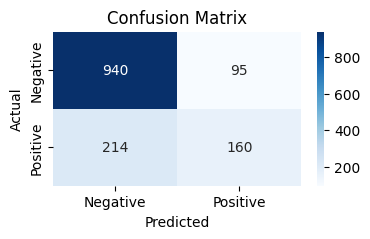


ROC AUC:  0.6680100235087447


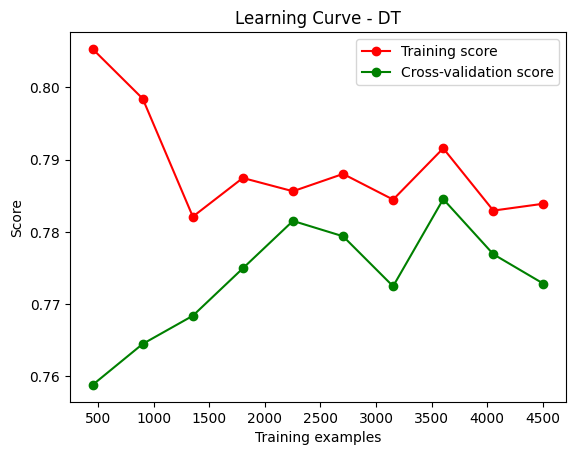

Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)
Mean cross-validation score: 0.79393255487383
Training score: 0.8049343272985445
Time to train and test classifier: 5.59 seconds

Accuracy with validation data: 79.70%

Classification report:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.68      0.45      0.54       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



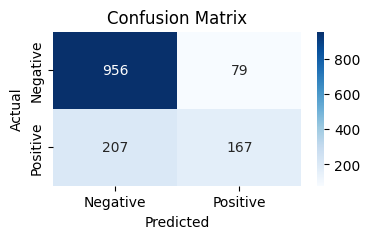


ROC AUC:  0.685097780877832


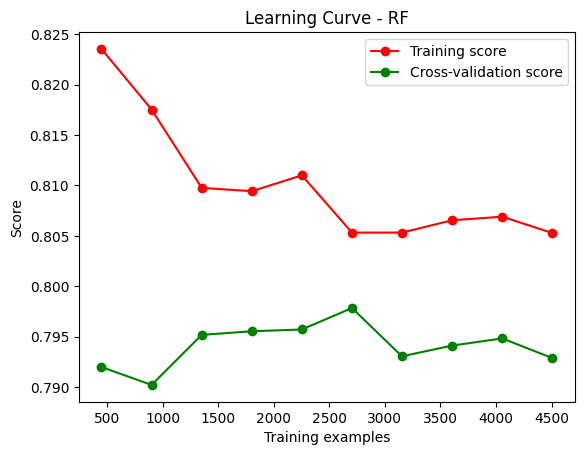

Model RF trained.

Training classifier SVM:
SVC(C=0.5697306865482487, kernel='linear')
Mean cross-validation score: 0.7967710058770593
Training score: 0.8022719204827831
Time to train and test classifier: 6.03 seconds

Accuracy with validation data: 80.06%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



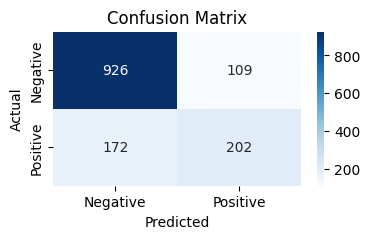


ROC AUC:  0.7173964711049109


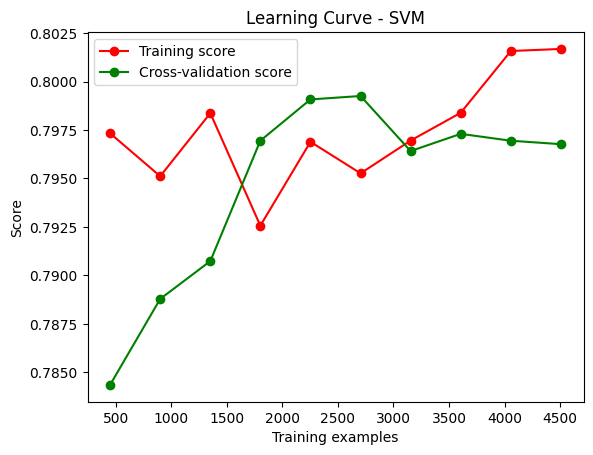

Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9)
Mean cross-validation score: 0.7594974633609719
Training score: 0.8143414980475683
Time to train and test classifier: 3.50 seconds

Accuracy with validation data: 77.64%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.78      0.77      1409



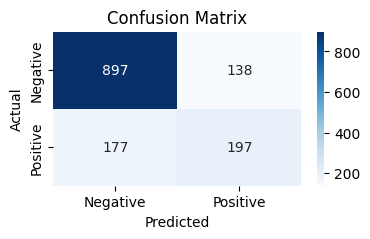


ROC AUC:  0.6967023172905527


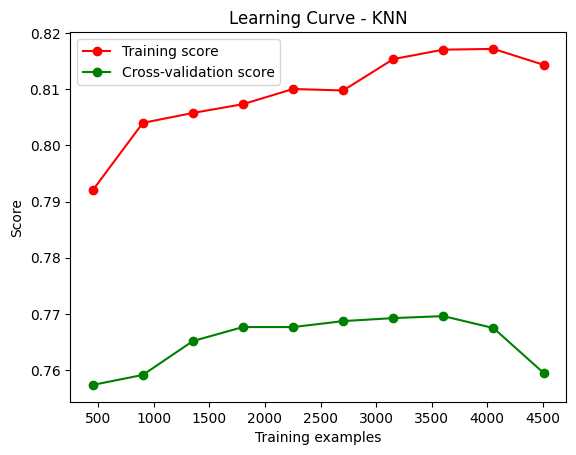

Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1000, solver='liblinear')
Mean cross-validation score: 0.8020970810132686
Training score: 0.8059992900248492
Time to train and test classifier: 0.29 seconds

Accuracy with validation data: 80.62%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



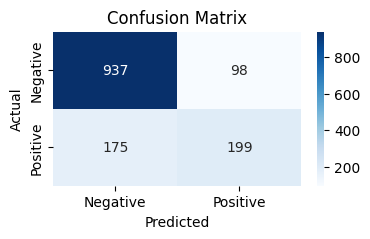


ROC AUC:  0.718699785579581


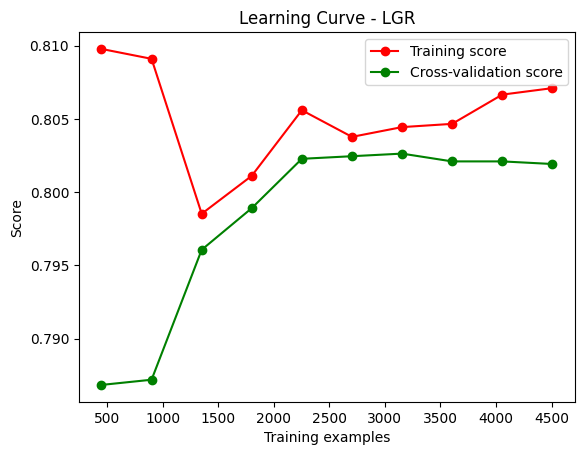

Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Mean cross-validation score: 0.7797324196494568
Training score: 0.7800851970181044
Time to train and test classifier: 0.06 seconds

Accuracy with validation data: 77.93%

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409



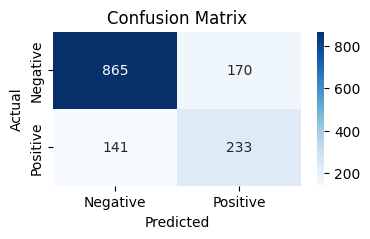


ROC AUC:  0.7293717223384742


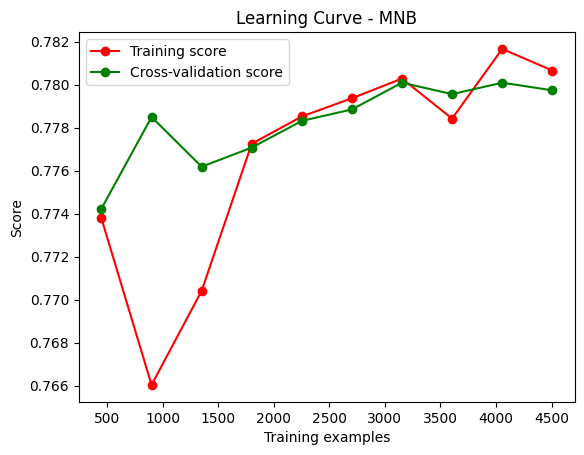

Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, learning_rate='adaptive')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean cross-validation score: 0.7999672183337772
Training score: 0.8010294639687611
Time to train and test classifier: 31.36 seconds

Accuracy with validation data: 80.20%

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



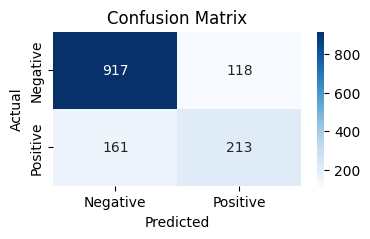


ROC AUC:  0.7277545273708956


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

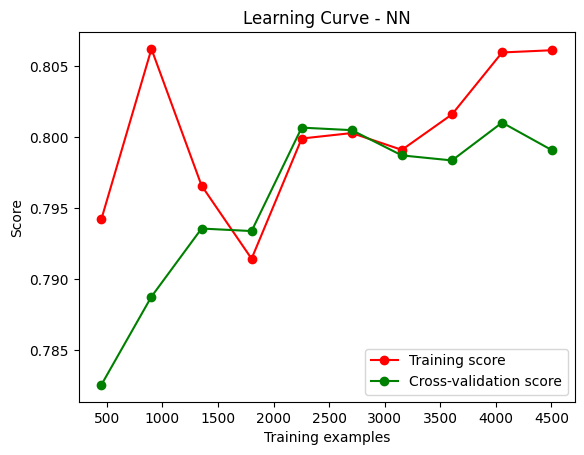

Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mean cross-validation score: 0.8013862862312274
Training score: 0.818778842740504
Time to train and test classifier: 0.98 seconds

Accuracy with validation data: 80.91%

Classification report:

             

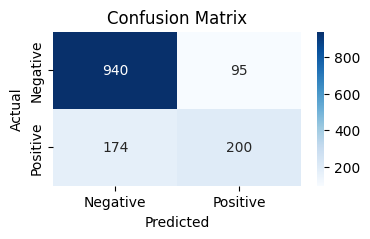


ROC AUC:  0.7214859593376217


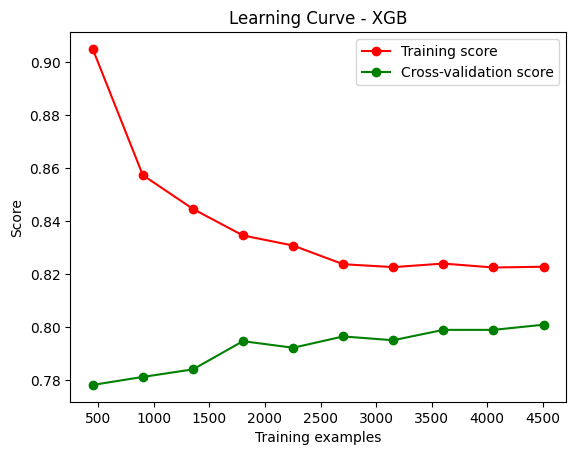

Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME')
Mean cross-validation score: 0.7994345162576575
Training score: 0.8072417465388712
Time to train and test classifier: 1.51 seconds

Accuracy with validation data: 80.48%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



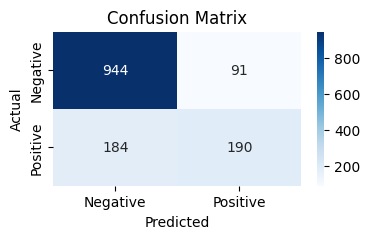


ROC AUC:  0.7100493425301609


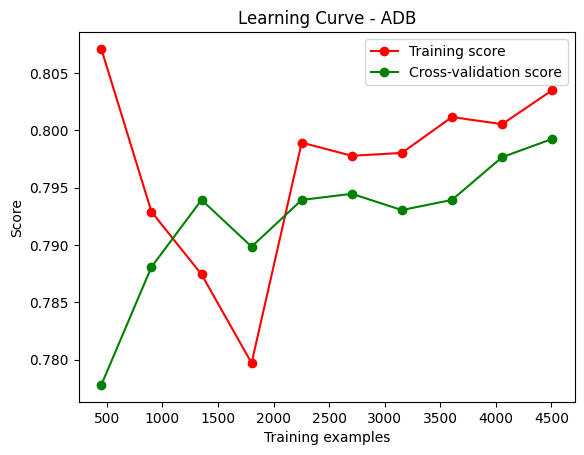

Model ADB trained.


In [ ]:
result = []
accuracy1 = []
precision1 = []
recall1 = []
f1score1 = []
auc1 = []
orgNormalised_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    cv_scores = cross_val_score(model, train_x, train_y, cv=5)
    mean_cv_score = cv_scores.mean()
    print("Mean cross-validation score:", mean_cv_score)
    model.fit(train_x, train_y)
    # Calculate training score
    train_score = model.score(train_x, train_y)
#    training_scores.append(train_score)
    print("Training score:", train_score)

    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t, mean_cv_score])
    accuracy1.append(acc)
    precision1.append(precision)
    recall1.append(recall)
    f1score1.append(f1)
    auc1.append(auc)

     # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve - {m}")
    plt.show()

    orgNormalised_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')



## Original data with StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_standardized, test_size=0.2, random_state=111, stratify = df_standardized.Churn)
x = df_standardized.columns[df_standardized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Mean cross-validation score: 0.7839918298001106
Training score: 0.7829250976215832
Time to train and test classifier: 0.06 seconds

Accuracy with validation data: 76.72%

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1035
           1       0.63      0.29      0.40       374

    accuracy                           0.77      1409
   macro avg       0.71      0.62      0.63      1409
weighted avg       0.75      0.77      0.73      1409



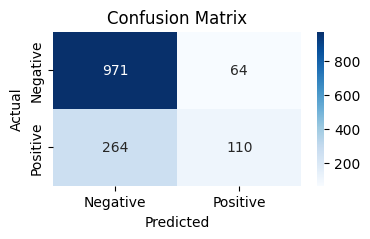


ROC AUC:  0.6161409491332765


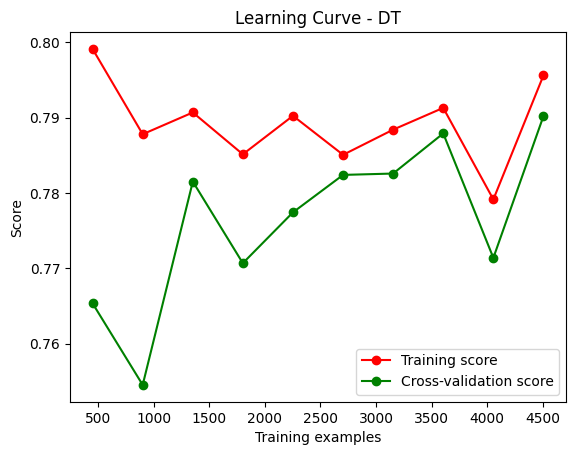

Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)
Mean cross-validation score: 0.7930449282191833
Training score: 0.8004969826056088
Time to train and test classifier: 2.18 seconds

Accuracy with validation data: 79.35%

Classification report:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.43      0.53       374

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



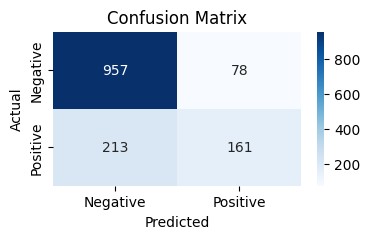


ROC AUC:  0.6775594822909401


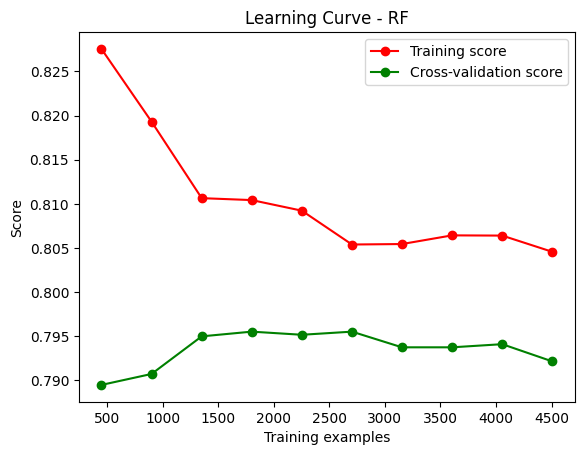

Model RF trained.

Training classifier SVM:
SVC(C=0.5697306865482487, kernel='linear')
Mean cross-validation score: 0.7965930707753023
Training score: 0.8004969826056088
Time to train and test classifier: 6.71 seconds

Accuracy with validation data: 79.63%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



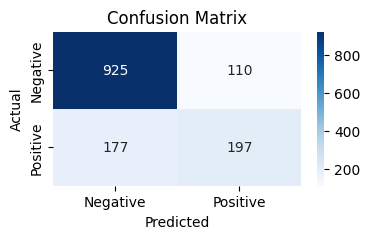


ROC AUC:  0.7102288873388618


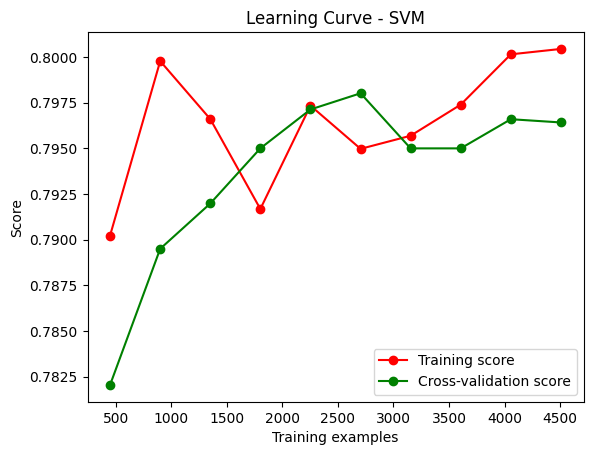

Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9)
Mean cross-validation score: 0.7721004379819731
Training score: 0.8194888178913738
Time to train and test classifier: 3.10 seconds

Accuracy with validation data: 78.64%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



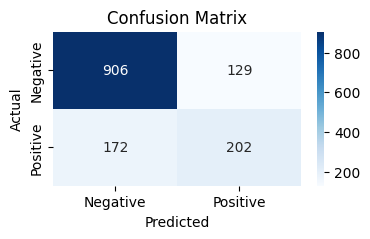


ROC AUC:  0.7077346353561187


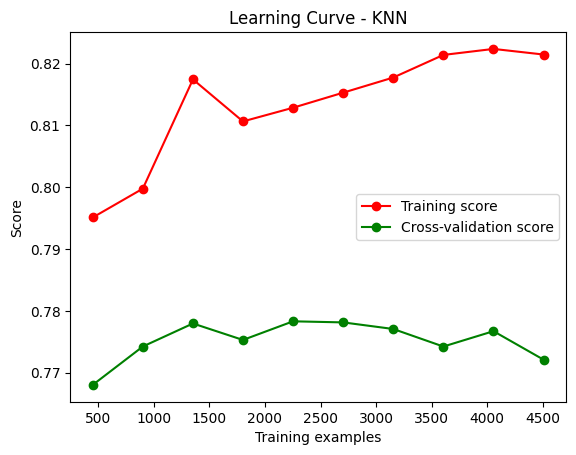

Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1000, solver='liblinear')
Mean cross-validation score: 0.8024520055917957
Training score: 0.8059992900248492
Time to train and test classifier: 0.37 seconds

Accuracy with validation data: 80.62%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



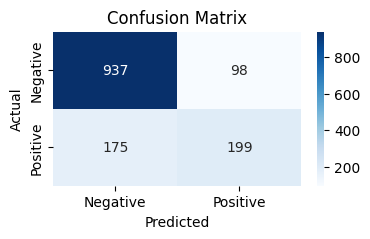


ROC AUC:  0.718699785579581


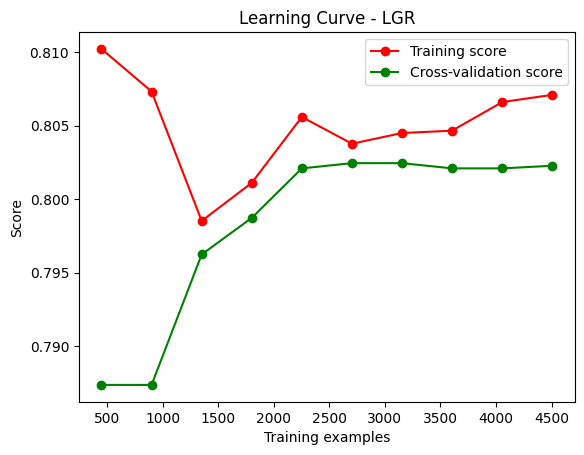

Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Mean cross-validation score: 0.7843469119828022
Training score: 0.784877529286475
Time to train and test classifier: 0.09 seconds

Accuracy with validation data: 80.41%

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1035
           1       0.62      0.68      0.65       374

    accuracy                           0.80      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.81      0.80      0.81      1409



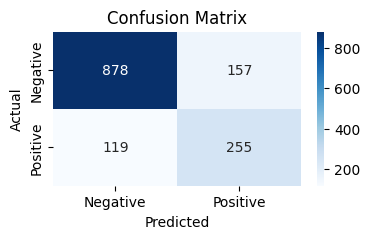


ROC AUC:  0.7650636802810715


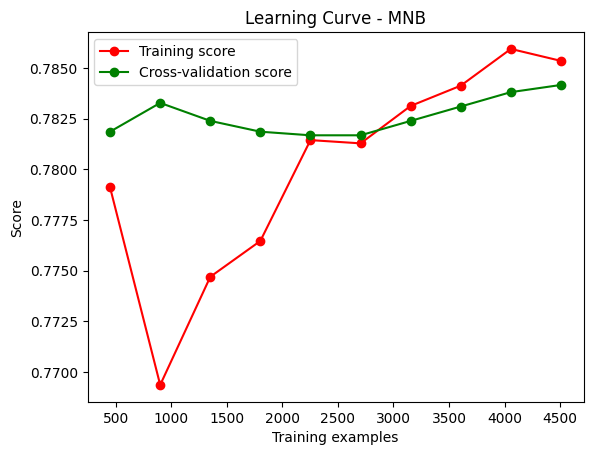

Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, learning_rate='adaptive')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean cross-validation score: 0.8015646941454782
Training score: 0.8059992900248492
Time to train and test classifier: 41.07 seconds

Accuracy with validation data: 79.91%

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



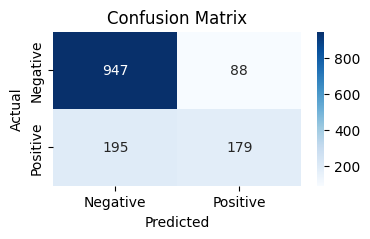


ROC AUC:  0.6967927355395386


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

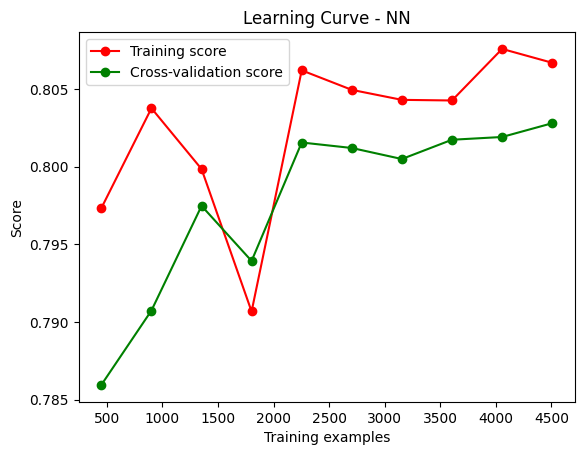

Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mean cross-validation score: 0.8013862862312274
Training score: 0.818778842740504
Time to train and test classifier: 0.65 seconds

Accuracy with validation data: 80.91%

Classification report:

             

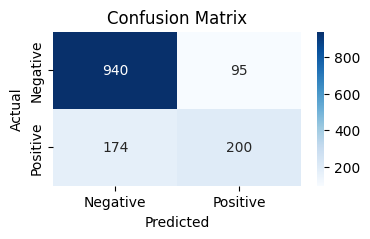


ROC AUC:  0.7214859593376217


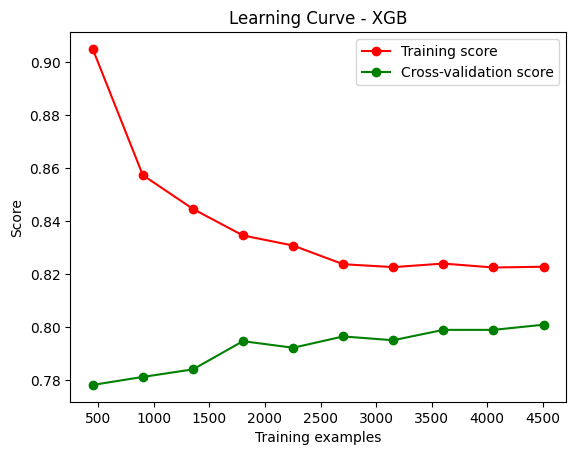

Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME')
Mean cross-validation score: 0.7994345162576575
Training score: 0.8072417465388712
Time to train and test classifier: 1.50 seconds

Accuracy with validation data: 80.48%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



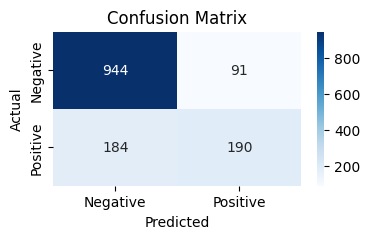


ROC AUC:  0.7100493425301609


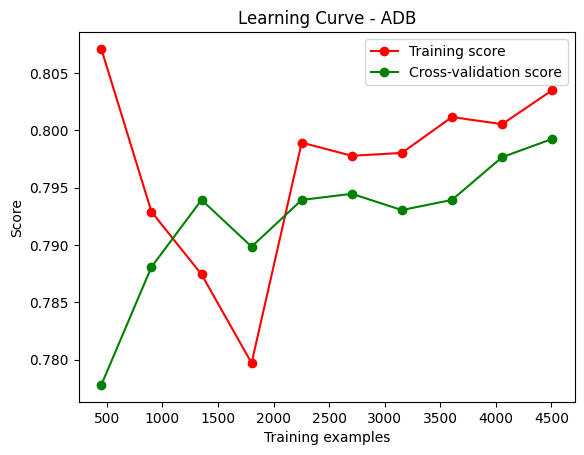

Model ADB trained.


In [ ]:
result = []
accuracy2 = []
precision2 = []
recall2 = []
f1score2 = []
auc2 = []
orgStandard_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    cv_scores = cross_val_score(model, train_x, train_y, cv=5)
    mean_cv_score = cv_scores.mean()
    print("Mean cross-validation score:", mean_cv_score)
    model.fit(train_x, train_y)
    # Calculate training score
    train_score = model.score(train_x, train_y)
    # training_scores.append(train_score)
    print("Training score:", train_score)


    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t])
    accuracy2.append(acc)
    precision2.append(precision)
    recall2.append(recall)
    f1score2.append(f1)
    auc2.append(auc)

    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve - {m}")
    plt.show()

    orgStandard_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')

## Upsampled data with MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_us_normalized, test_size=0.2, random_state=111, stratify = df_us_normalized.Churn)
x = df_us_normalized.columns[df_us_normalized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Mean cross-validation score: 0.7784474655924807
Training score: 0.7725295965208988
Time to train and test classifier: 0.29 seconds

Accuracy with validation data: 77.25%

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1035
           1       0.74      0.83      0.78      1035

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



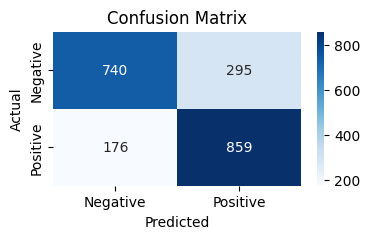


ROC AUC:  0.7724637681159421


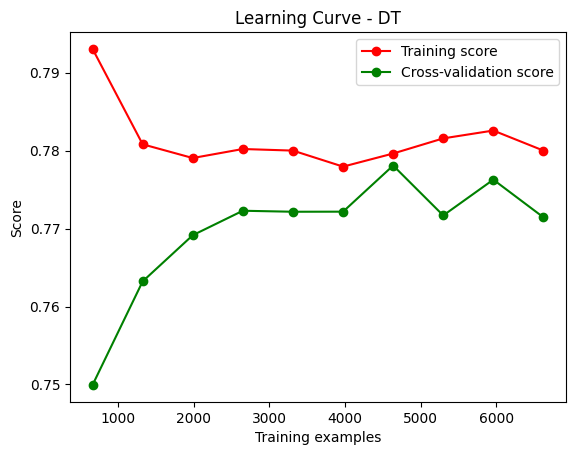

Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)
Mean cross-validation score: 0.8160180685085454
Training score: 0.8261657405170331
Time to train and test classifier: 8.18 seconds

Accuracy with validation data: 82.17%

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1035
           1       0.78      0.89      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



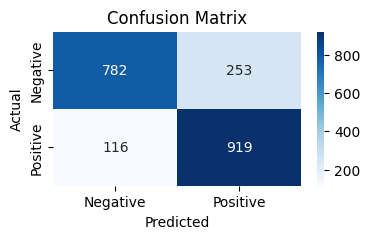


ROC AUC:  0.8217391304347825


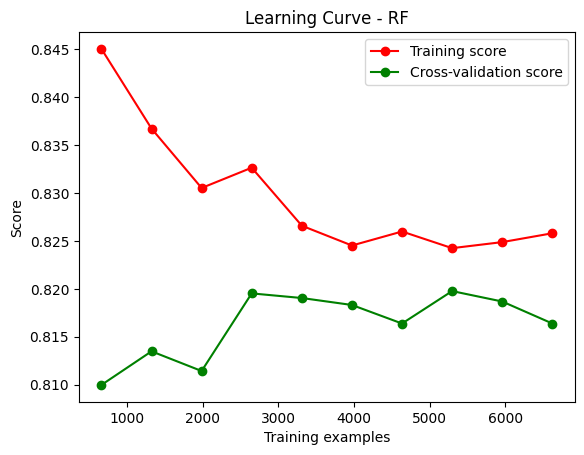

Model RF trained.

Training classifier SVM:
SVC(C=0.5697306865482487, kernel='linear')
Mean cross-validation score: 0.84307894391173
Training score: 0.8441652573085286
Time to train and test classifier: 10.67 seconds

Accuracy with validation data: 83.67%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1035
           1       0.84      0.84      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



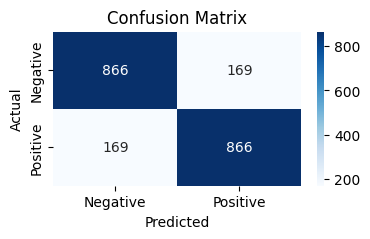


ROC AUC:  0.8367149758454107


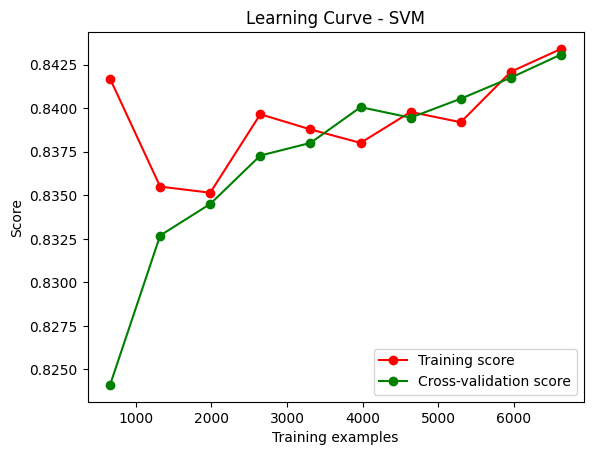

Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9)
Mean cross-validation score: 0.8203680108586191
Training score: 0.8537086252718048
Time to train and test classifier: 7.79 seconds

Accuracy with validation data: 81.59%

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1035
           1       0.78      0.87      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



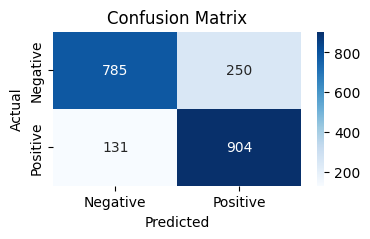


ROC AUC:  0.8159420289855073


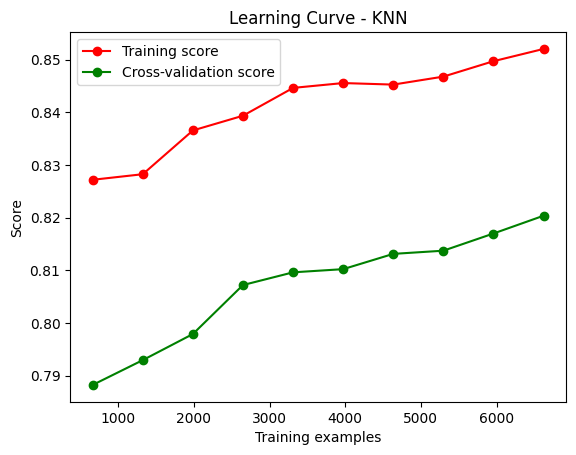

Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1000, solver='liblinear')
Mean cross-validation score: 0.8452535137265205
Training score: 0.8467021019569945
Time to train and test classifier: 0.74 seconds

Accuracy with validation data: 83.77%

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.85      0.83      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



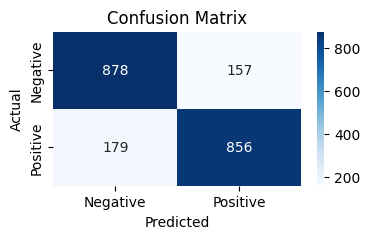


ROC AUC:  0.8376811594202899


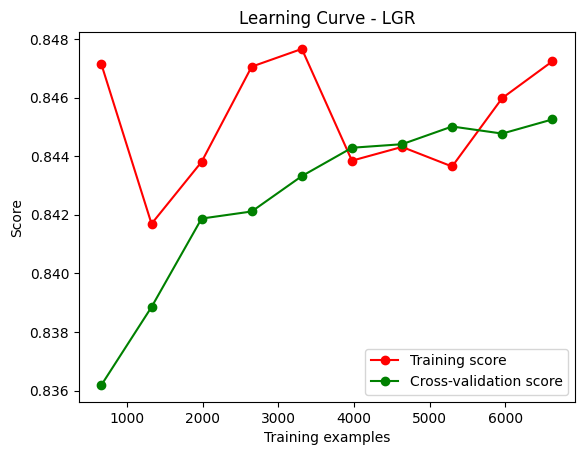

Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Mean cross-validation score: 0.792826451829473
Training score: 0.793307562213095
Time to train and test classifier: 0.09 seconds

Accuracy with validation data: 81.06%

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1035
           1       0.79      0.84      0.82      1035

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



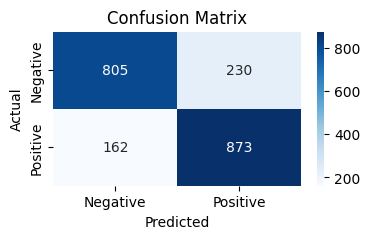


ROC AUC:  0.8106280193236716


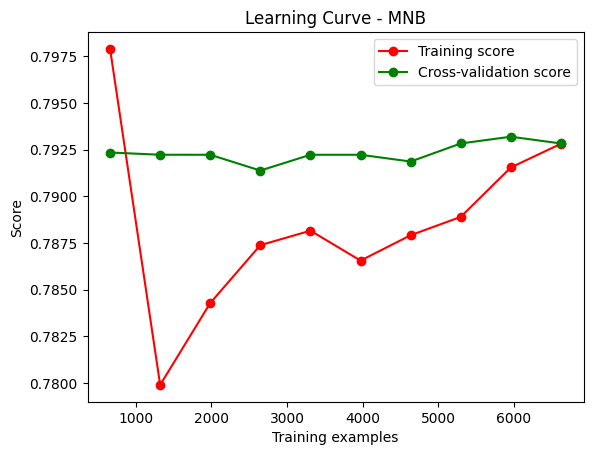

Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, learning_rate='adaptive')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean cross-validation score: 0.8459781514076798


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training score: 0.8540710316501571
Time to train and test classifier: 77.16 seconds

Accuracy with validation data: 84.73%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.85      0.84      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



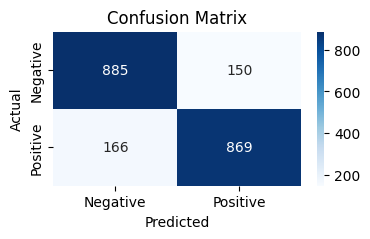


ROC AUC:  0.8473429951690822


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

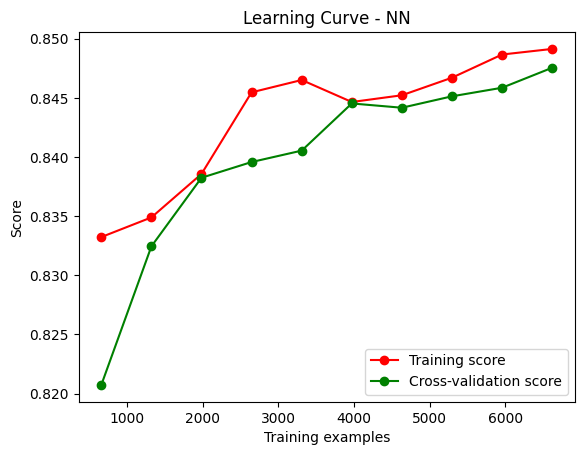

Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mean cross-validation score: 0.8438035815928894
Training score: 0.8564870741725055
Time to train and test classifier: 0.82 seconds

Accuracy with validation data: 84.01%

Classification report:

            

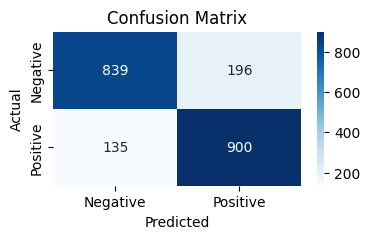


ROC AUC:  0.8400966183574878


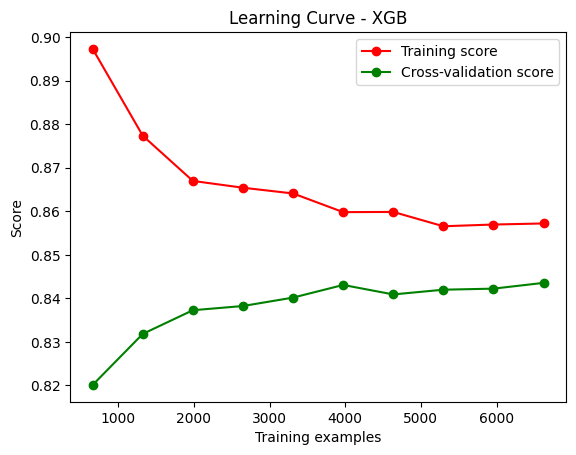

Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME')
Mean cross-validation score: 0.8150534174000613
Training score: 0.8150519449142305
Time to train and test classifier: 2.09 seconds

Accuracy with validation data: 82.22%

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1035
           1       0.80      0.86      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



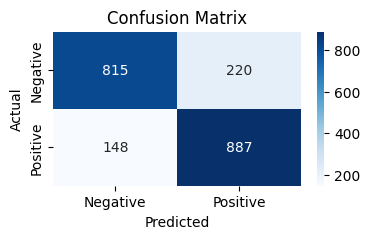


ROC AUC:  0.8222222222222221


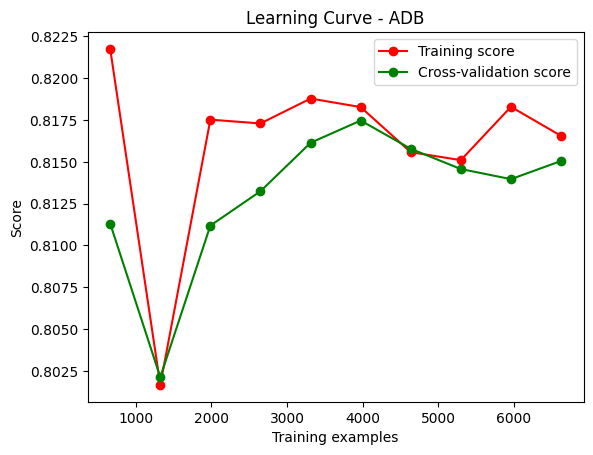

Model ADB trained.


In [ ]:
result = []
accuracy3 = []
precision3 = []
recall3 = []
f1score3 = []
auc3 = []
usNormalised_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    cv_scores = cross_val_score(model, train_x, train_y, cv=5)
    mean_cv_score = cv_scores.mean()
    print("Mean cross-validation score:", mean_cv_score)
    model.fit(train_x, train_y)
    # Calculate training score
    train_score = model.score(train_x, train_y)
    # training_scores.append(train_score)
    print("Training score:", train_score)


    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t])
    accuracy3.append(acc)
    precision3.append(precision)
    recall3.append(recall)
    f1score3.append(f1)
    auc3.append(auc)

    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve - {m}")
    plt.show()

    usNormalised_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')

## Upsampled data with StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_us_standardized, test_size=0.2, random_state=111, stratify = df_us_standardized.Churn)
x = df_us_standardized.columns[df_us_standardized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Mean cross-validation score: 0.7724090371732563
Training score: 0.7763952645566562
Time to train and test classifier: 0.09 seconds

Accuracy with validation data: 75.94%

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1035
           1       0.77      0.74      0.75      1035

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



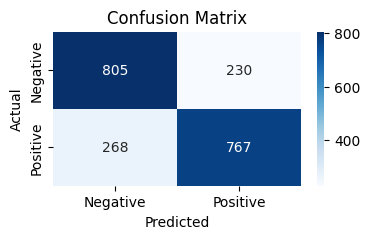


ROC AUC:  0.7594202898550724


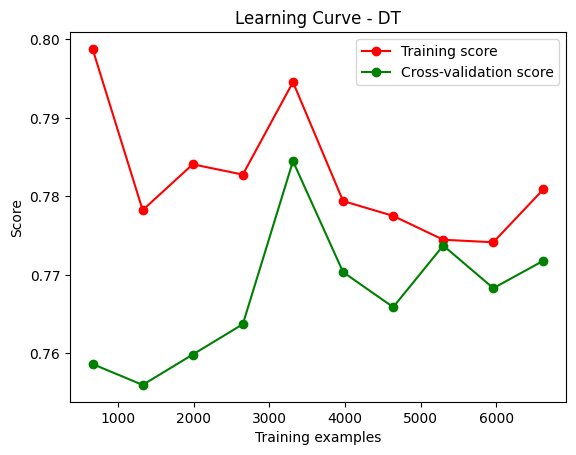

Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)
Mean cross-validation score: 0.8163812630442079
Training score: 0.8231456873640977
Time to train and test classifier: 2.73 seconds

Accuracy with validation data: 82.17%

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1035
           1       0.79      0.87      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



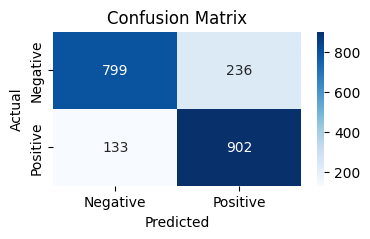


ROC AUC:  0.8217391304347826


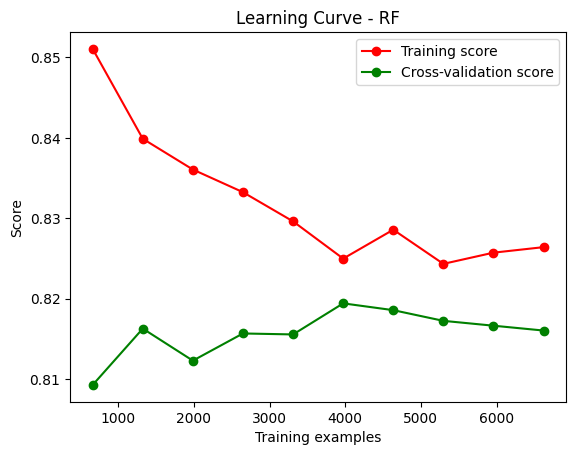

Model RF trained.

Training classifier SVM:
SVC(C=0.5697306865482487, kernel='linear')
Mean cross-validation score: 0.8432005195790826
Training score: 0.8457356849480551
Time to train and test classifier: 10.92 seconds

Accuracy with validation data: 84.30%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.85      0.84      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



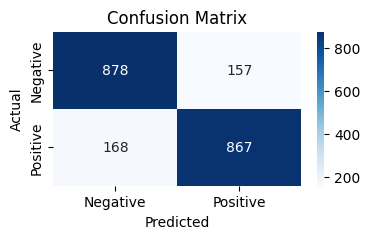


ROC AUC:  0.8429951690821256


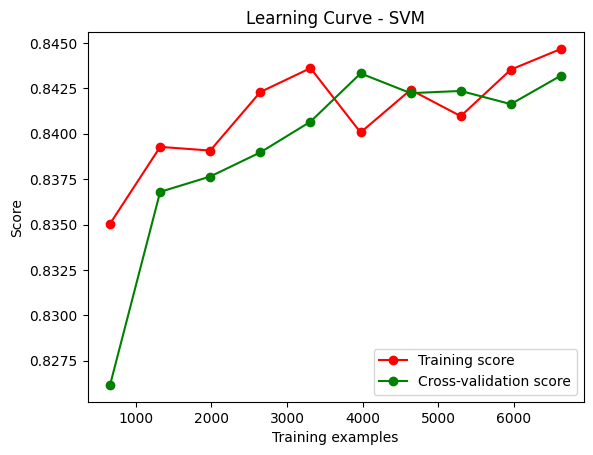

Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9)
Mean cross-validation score: 0.8198852839441308
Training score: 0.8574534911814448
Time to train and test classifier: 3.66 seconds

Accuracy with validation data: 82.17%

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1035
           1       0.79      0.87      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



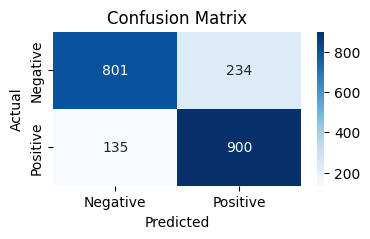


ROC AUC:  0.8217391304347825


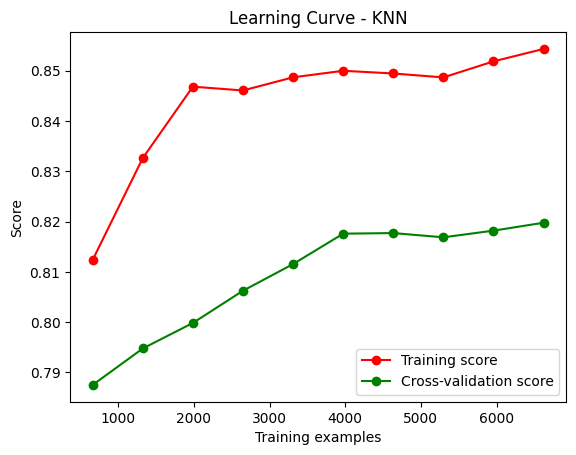

Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1000, solver='liblinear')
Mean cross-validation score: 0.845374505597151
Training score: 0.8457356849480551
Time to train and test classifier: 0.65 seconds

Accuracy with validation data: 84.06%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1035
           1       0.85      0.83      0.84      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



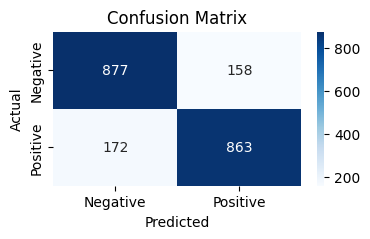


ROC AUC:  0.8405797101449275


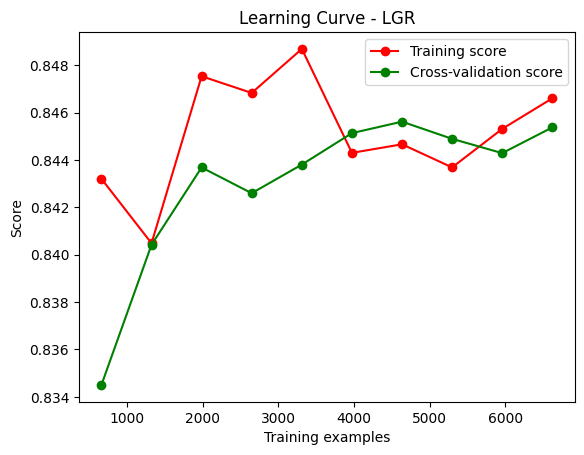

Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Mean cross-validation score: 0.7925841032152604
Training score: 0.7931867600869775
Time to train and test classifier: 0.09 seconds

Accuracy with validation data: 80.05%

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1035
           1       0.79      0.82      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



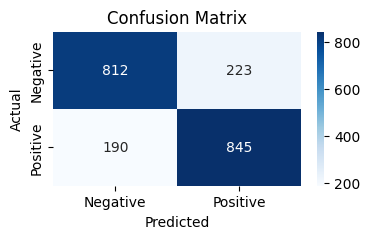


ROC AUC:  0.8004830917874396


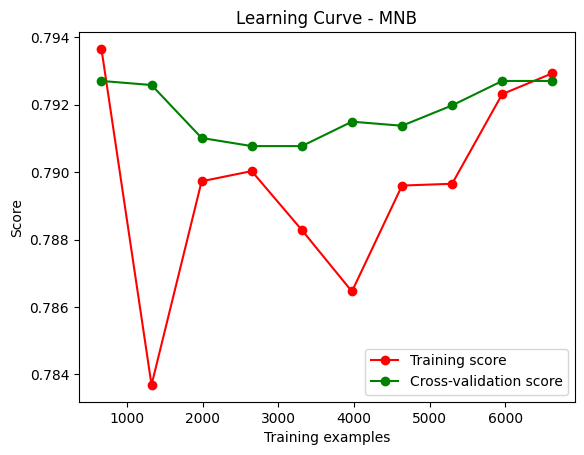

Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, learning_rate='adaptive')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean cross-validation score: 0.851293182713779


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training score: 0.8591447209470887
Time to train and test classifier: 74.60 seconds

Accuracy with validation data: 85.75%

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.87      0.84      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



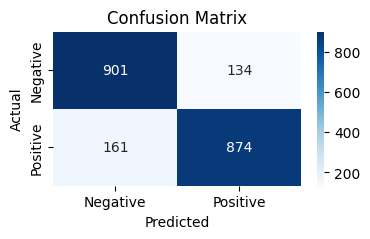


ROC AUC:  0.857487922705314


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

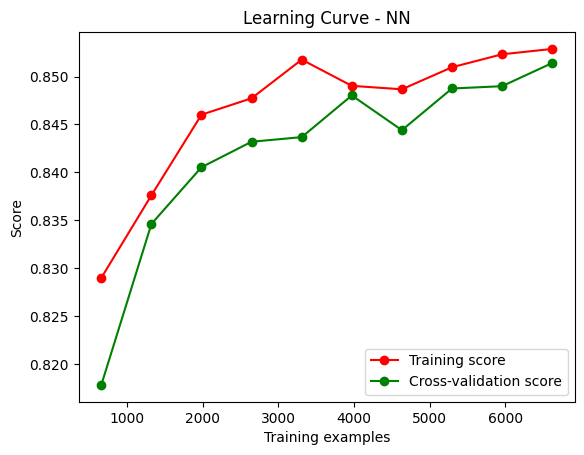

Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mean cross-validation score: 0.846461097245939
Training score: 0.8585407103165016
Time to train and test classifier: 2.34 seconds

Accuracy with validation data: 84.25%

Classification report:

             

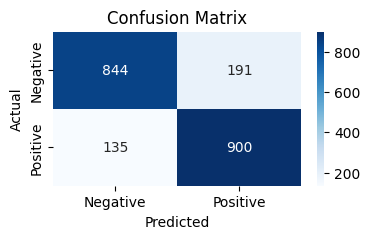


ROC AUC:  0.8425120772946859


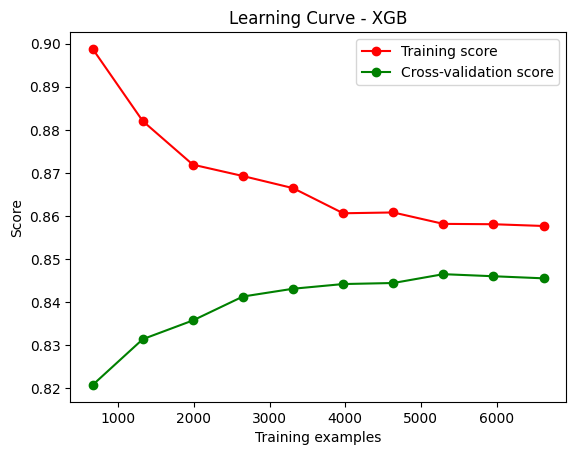

Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME')
Mean cross-validation score: 0.8156586686515755
Training score: 0.8197632278328099
Time to train and test classifier: 2.04 seconds

Accuracy with validation data: 81.30%

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1035
           1       0.79      0.85      0.82      1035

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



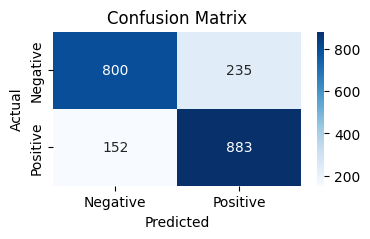


ROC AUC:  0.8130434782608695


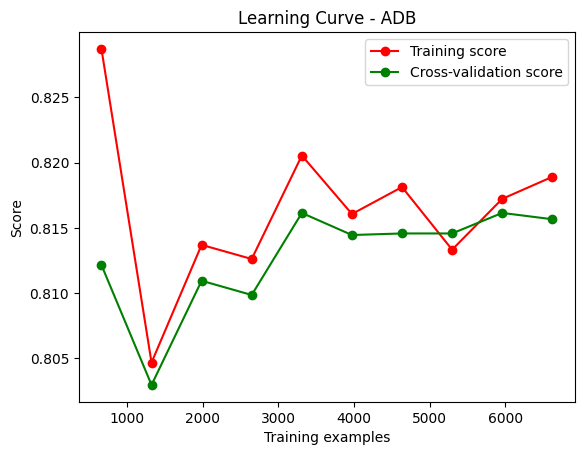

Model ADB trained.


In [ ]:
result = []
accuracy4 = []
precision4 = []
recall4 = []
f1score4 = []
auc4 = []
usStandard_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    cv_scores = cross_val_score(model, train_x, train_y, cv=5)
    mean_cv_score = cv_scores.mean()
    print("Mean cross-validation score:", mean_cv_score)
    model.fit(train_x, train_y)
    # Calculate training score
    train_score = model.score(train_x, train_y)
    # training_scores.append(train_score)
    print("Training score:", train_score)


    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t])
    accuracy4.append(acc)
    precision4.append(precision)
    recall4.append(recall)
    f1score4.append(f1)
    auc4.append(auc)

    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve - {m}")
    plt.show()

    usStandard_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')

## Downsampled data with MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ds_normalized, test_size=0.2, random_state=111, stratify = df_ds_normalized.Churn)
x = df_ds_normalized.columns[df_ds_normalized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Mean cross-validation score: 0.7468227424749163
Training score: 0.7632107023411371
Time to train and test classifier: 0.05 seconds

Accuracy with validation data: 74.73%

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       374
           1       0.74      0.77      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



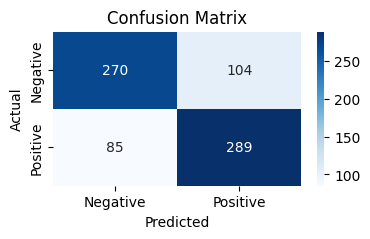


ROC AUC:  0.7473262032085561


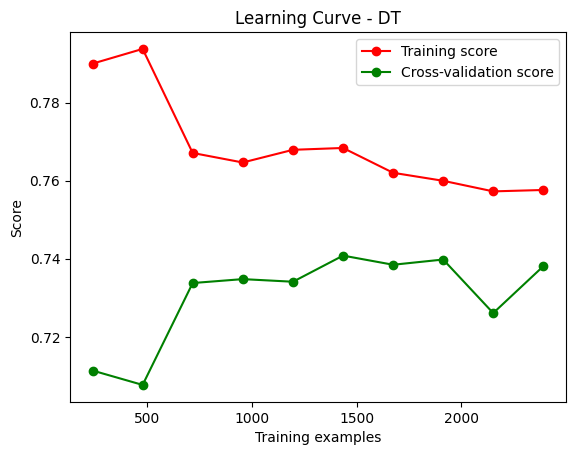

Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)
Mean cross-validation score: 0.7578595317725751
Training score: 0.7735785953177258
Time to train and test classifier: 1.65 seconds

Accuracy with validation data: 74.47%

Classification report:

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       374
           1       0.72      0.80      0.76       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



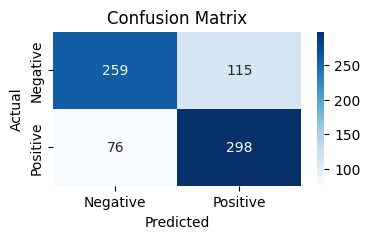


ROC AUC:  0.7446524064171123


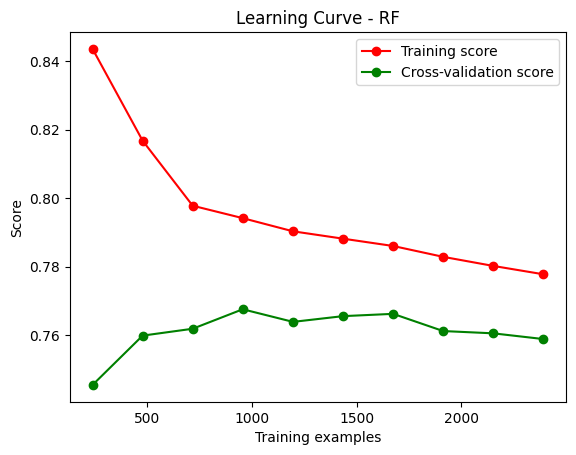

Model RF trained.

Training classifier SVM:
SVC(C=0.5697306865482487, kernel='linear')
Mean cross-validation score: 0.7494983277591972
Training score: 0.7494983277591973
Time to train and test classifier: 3.79 seconds

Accuracy with validation data: 71.12%

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       374
           1       0.68      0.81      0.74       374

    accuracy                           0.71       748
   macro avg       0.72      0.71      0.71       748
weighted avg       0.72      0.71      0.71       748



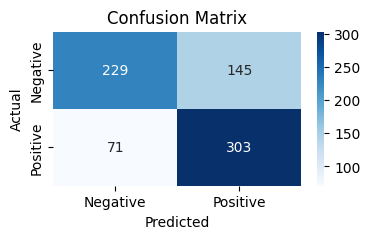


ROC AUC:  0.7112299465240641


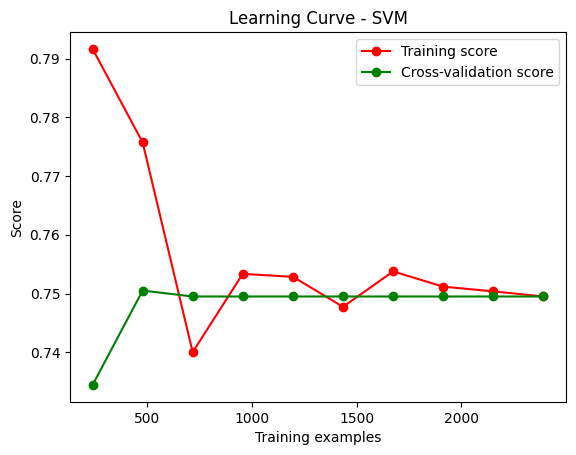

Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9)
Mean cross-validation score: 0.725752508361204
Training score: 0.7779264214046823
Time to train and test classifier: 1.21 seconds

Accuracy with validation data: 74.47%

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       374
           1       0.71      0.83      0.77       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



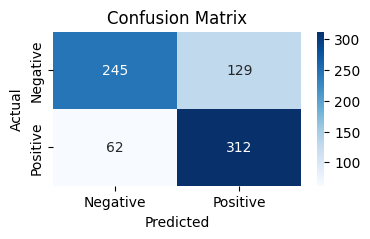


ROC AUC:  0.7446524064171123


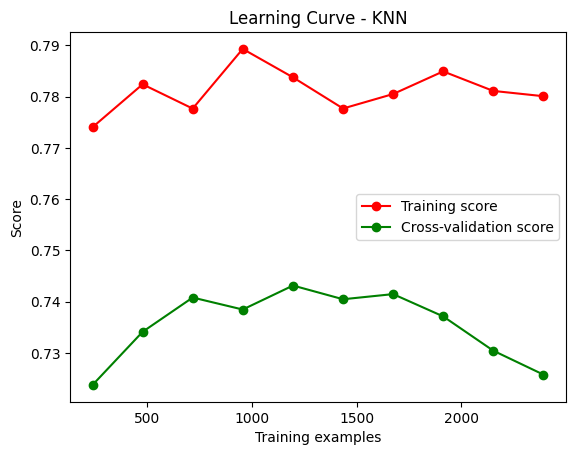

Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1000, solver='liblinear')
Mean cross-validation score: 0.759866220735786
Training score: 0.7648829431438127
Time to train and test classifier: 0.29 seconds

Accuracy with validation data: 74.06%

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       374
           1       0.73      0.77      0.75       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



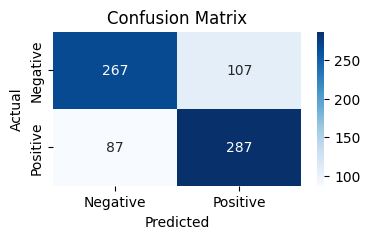


ROC AUC:  0.7406417112299465


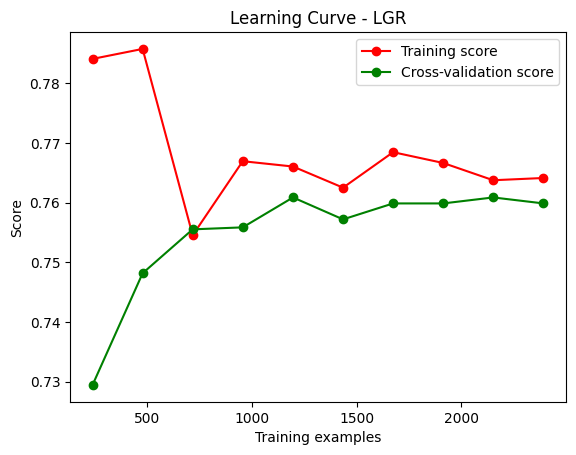

Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Mean cross-validation score: 0.75685618729097
Training score: 0.7581939799331103
Time to train and test classifier: 0.08 seconds

Accuracy with validation data: 72.73%

Classification report:

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       374
           1       0.72      0.75      0.73       374

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



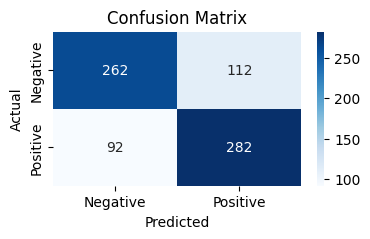


ROC AUC:  0.7272727272727273


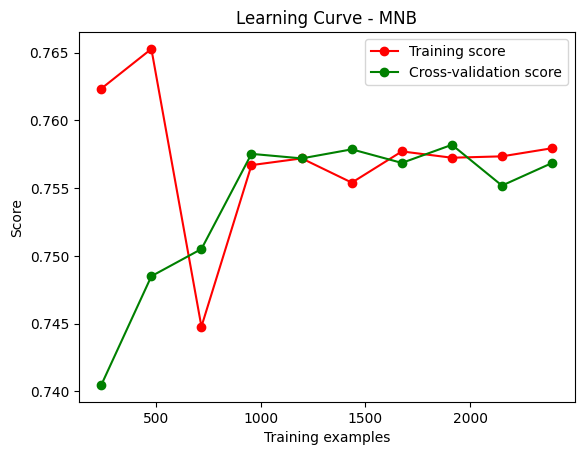

Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, learning_rate='adaptive')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean cross-validation score: 0.759866220735786
Training score: 0.7672240802675585
Time to train and test classifier: 14.71 seconds

Accuracy with validation data: 74.33%

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       374
           1       0.74      0.76      0.75       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



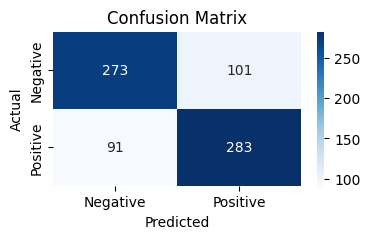


ROC AUC:  0.7433155080213905


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

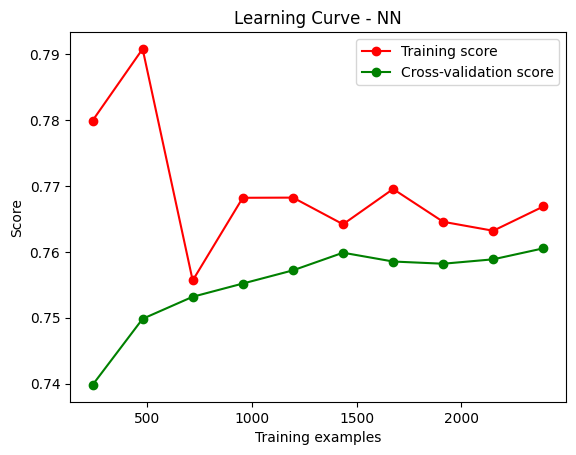

Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mean cross-validation score: 0.7591973244147157
Training score: 0.8003344481605351
Time to train and test classifier: 0.50 seconds

Accuracy with validation data: 74.06%

Classification report:

            

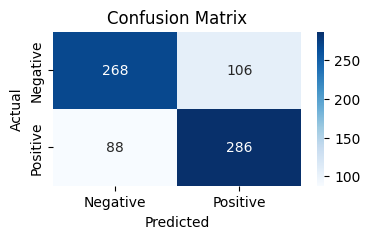


ROC AUC:  0.7406417112299465


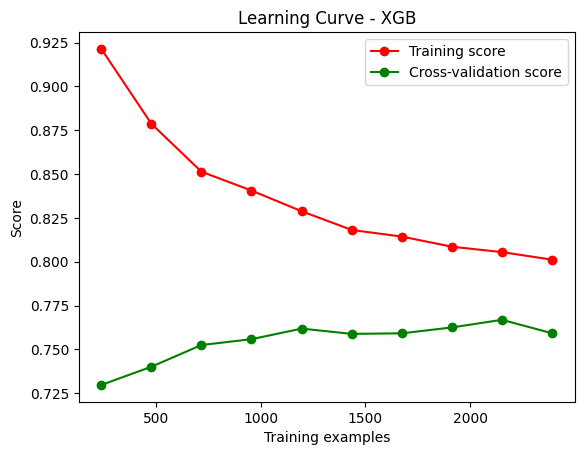

Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME')
Mean cross-validation score: 0.7612040133779264
Training score: 0.7705685618729097
Time to train and test classifier: 1.06 seconds

Accuracy with validation data: 75.27%

Classification report:

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       374
           1       0.73      0.79      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



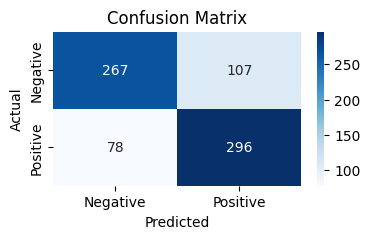


ROC AUC:  0.7526737967914439


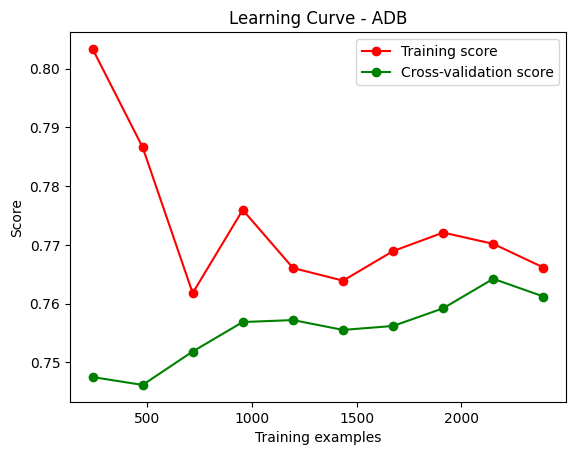

Model ADB trained.


In [ ]:
result = []
accuracy5 = []
precision5 = []
recall5 = []
f1score5 = []
auc5 = []
dsNormalised_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    cv_scores = cross_val_score(model, train_x, train_y, cv=5)
    mean_cv_score = cv_scores.mean()
    print("Mean cross-validation score:", mean_cv_score)
    model.fit(train_x, train_y)
    # Calculate training score
    train_score = model.score(train_x, train_y)
#    training_scores.append(train_score)
    print("Training score:", train_score)


    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t])
    accuracy5.append(acc)
    precision5.append(precision)
    recall5.append(recall)
    f1score5.append(f1)
    auc5.append(auc)

    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve - {m}")
    plt.show()

    dsNormalised_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')

## Downsampled data with StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ds_standardized, test_size=0.2, random_state=111, stratify = df_ds_standardized.Churn)
x = df_ds_standardized.columns[df_ds_standardized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Mean cross-validation score: 0.7525083612040133
Training score: 0.757190635451505
Time to train and test classifier: 0.06 seconds

Accuracy with validation data: 71.52%

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       374
           1       0.69      0.79      0.74       374

    accuracy                           0.72       748
   macro avg       0.72      0.72      0.71       748
weighted avg       0.72      0.72      0.71       748



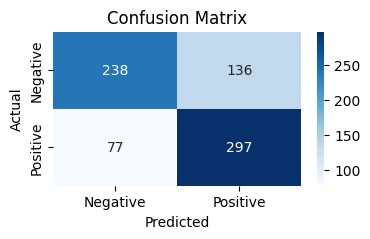


ROC AUC:  0.7152406417112299


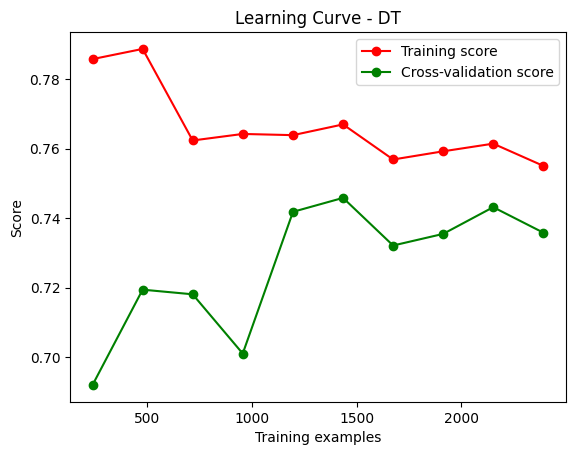

Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)
Mean cross-validation score: 0.7608695652173914
Training score: 0.7755852842809364
Time to train and test classifier: 1.63 seconds

Accuracy with validation data: 74.87%

Classification report:

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       374
           1       0.72      0.80      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



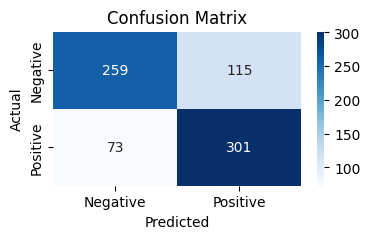


ROC AUC:  0.7486631016042781


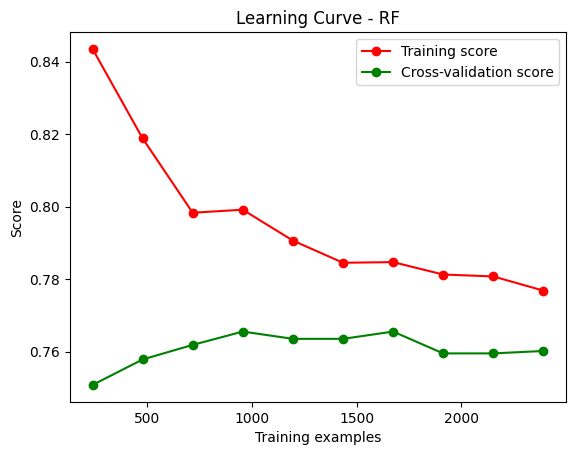

Model RF trained.

Training classifier SVM:
SVC(C=0.5697306865482487, kernel='linear')
Mean cross-validation score: 0.7494983277591972
Training score: 0.7494983277591973
Time to train and test classifier: 1.77 seconds

Accuracy with validation data: 71.12%

Classification report:

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       374
           1       0.68      0.81      0.74       374

    accuracy                           0.71       748
   macro avg       0.72      0.71      0.71       748
weighted avg       0.72      0.71      0.71       748



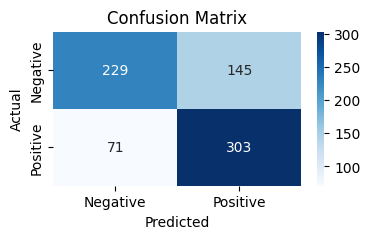


ROC AUC:  0.7112299465240641


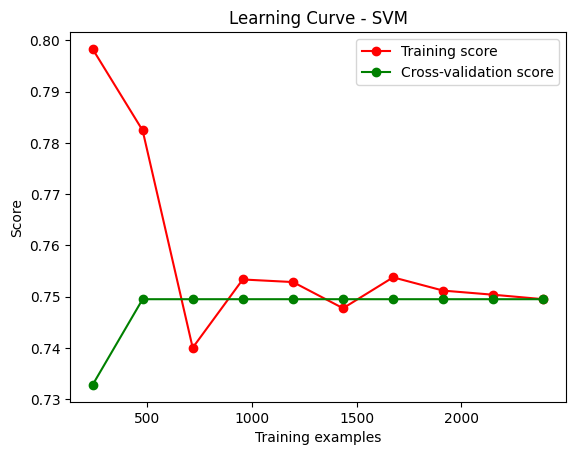

Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=9)
Mean cross-validation score: 0.7324414715719063
Training score: 0.7876254180602007
Time to train and test classifier: 0.84 seconds

Accuracy with validation data: 74.73%

Classification report:

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       374
           1       0.72      0.80      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



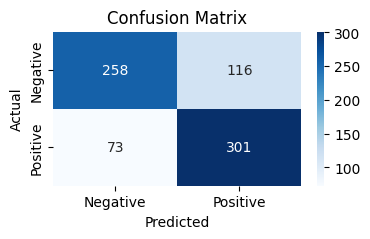


ROC AUC:  0.747326203208556


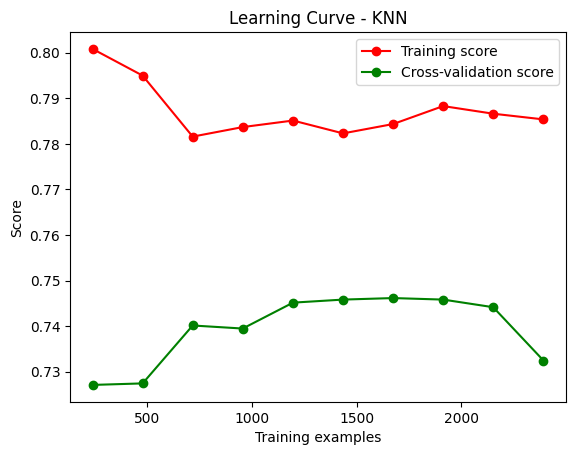

Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1000, solver='liblinear')
Mean cross-validation score: 0.759866220735786
Training score: 0.7648829431438127
Time to train and test classifier: 0.15 seconds

Accuracy with validation data: 74.06%

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       374
           1       0.73      0.77      0.75       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



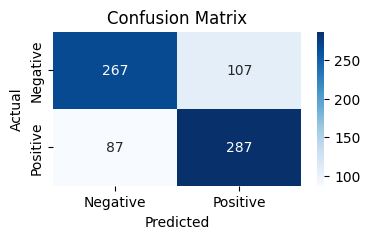


ROC AUC:  0.7406417112299465


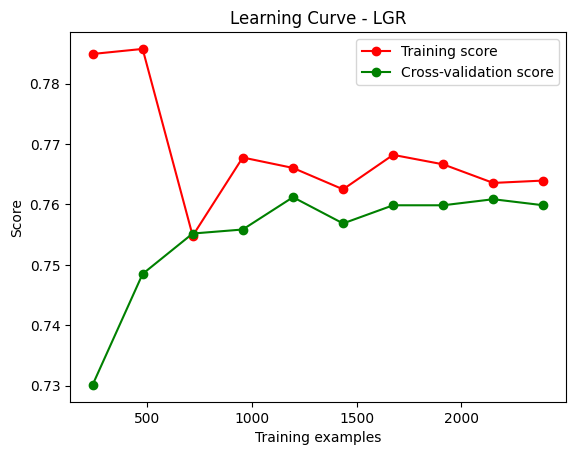

Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Mean cross-validation score: 0.7605351170568563
Training score: 0.7622073578595318
Time to train and test classifier: 0.06 seconds

Accuracy with validation data: 73.93%

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       374
           1       0.73      0.76      0.75       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



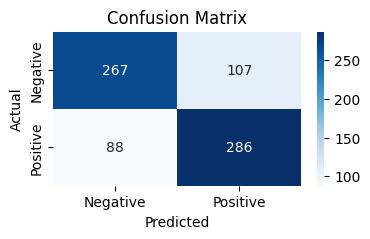


ROC AUC:  0.7393048128342246


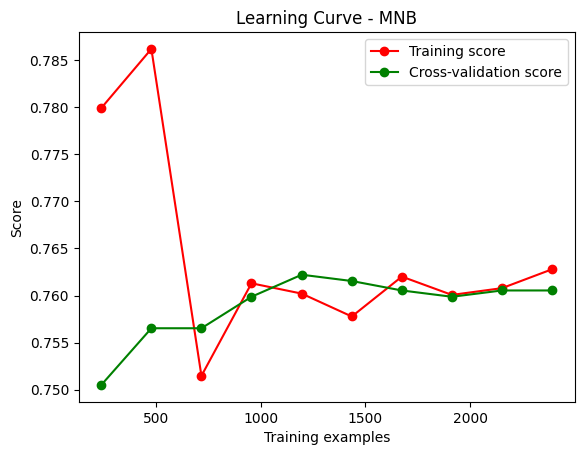

Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, learning_rate='adaptive')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean cross-validation score: 0.7578595317725753


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training score: 0.7702341137123746
Time to train and test classifier: 23.51 seconds

Accuracy with validation data: 75.13%

Classification report:

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       374
           1       0.74      0.78      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



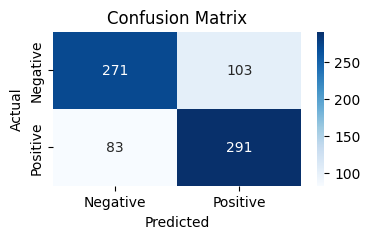


ROC AUC:  0.7513368983957219


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

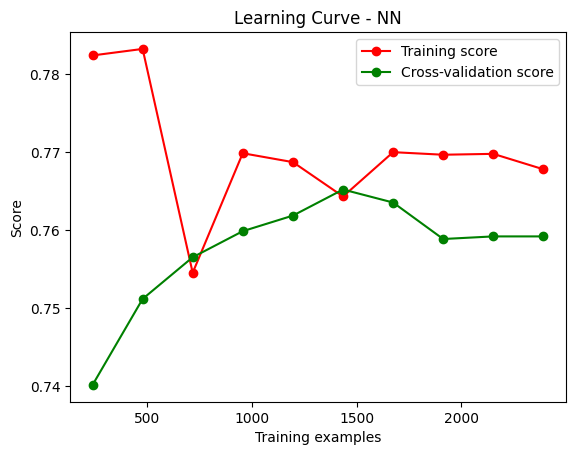

Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mean cross-validation score: 0.7591973244147157
Training score: 0.8003344481605351
Time to train and test classifier: 0.48 seconds

Accuracy with validation data: 74.06%

Classification report:

            

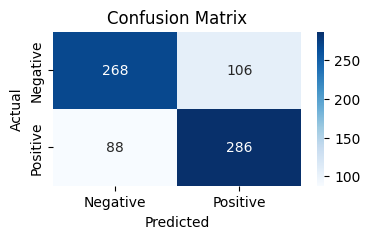


ROC AUC:  0.7406417112299465


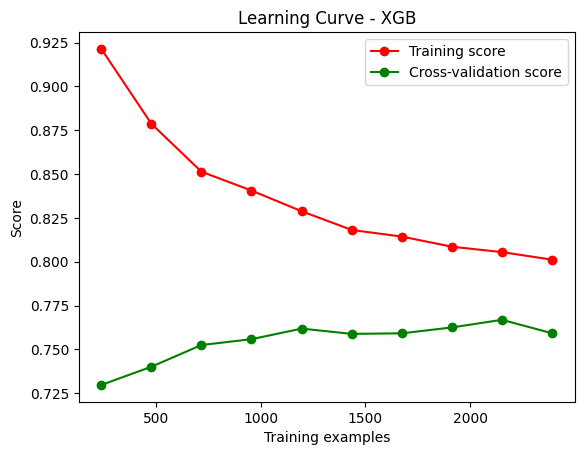

Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME')
Mean cross-validation score: 0.7612040133779264
Training score: 0.7705685618729097
Time to train and test classifier: 1.08 seconds

Accuracy with validation data: 75.27%

Classification report:

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       374
           1       0.73      0.79      0.76       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



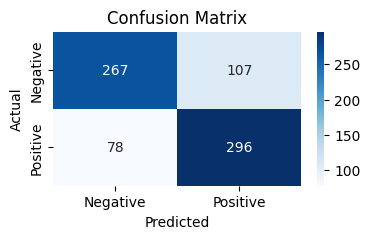


ROC AUC:  0.7526737967914439


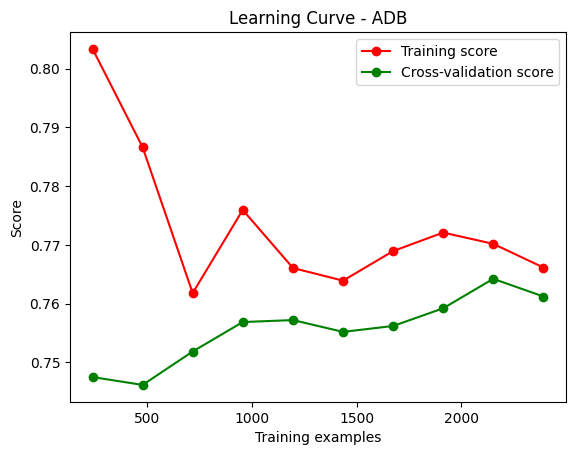

Model ADB trained.


In [ ]:
result = []
accuracy6 = []
precision6 = []
recall6 = []
f1score6 = []
auc6 = []
dsStandard_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    cv_scores = cross_val_score(model, train_x, train_y, cv=5)
    mean_cv_score = cv_scores.mean()
    print("Mean cross-validation score:", mean_cv_score)
    model.fit(train_x, train_y)
    # Calculate training score
    train_score = model.score(train_x, train_y)
#    training_scores.append(train_score)
    print("Training score:", train_score)


    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t])
    accuracy6.append(acc)
    precision6.append(precision)
    recall6.append(recall)
    f1score6.append(f1)
    auc6.append(auc)

    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title(f"Learning Curve - {m}")
    plt.show()

    dsStandard_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')

In [ ]:
print(len(accuracy1))

9


#Evaluation

##Accuracy

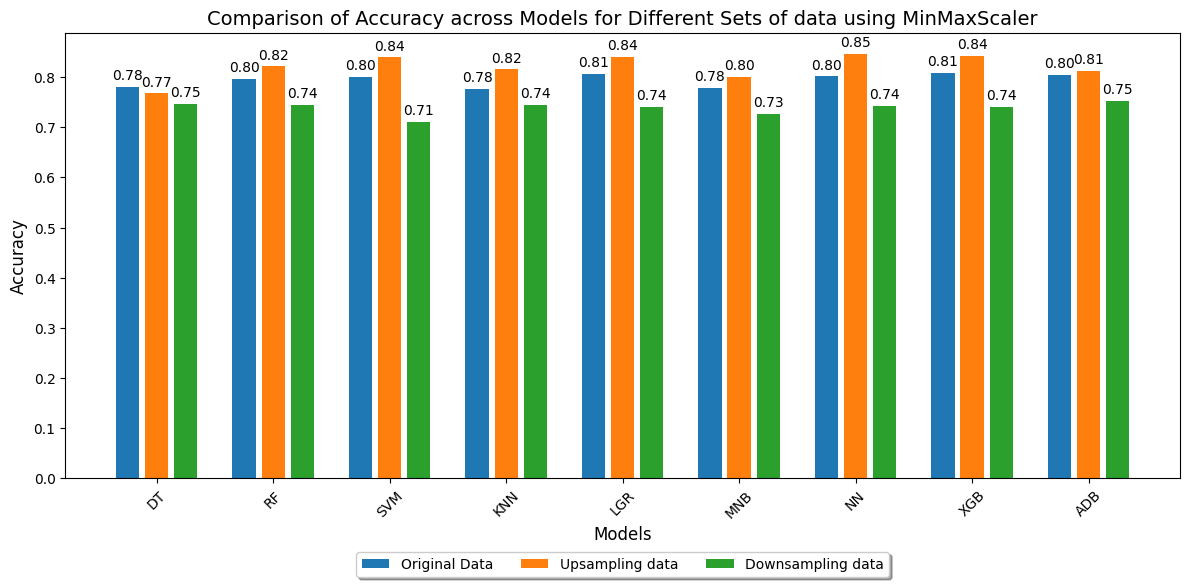

In [ ]:
mm_accuracy = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': accuracy1,
    'Set 2': accuracy3,
    'Set 3': accuracy5,
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, mm_accuracy['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, mm_accuracy['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, mm_accuracy['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Accuracy across Models for Different Sets of data using MinMaxScaler', fontsize=14)
plt.xticks(index + bar_width , mm_accuracy['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

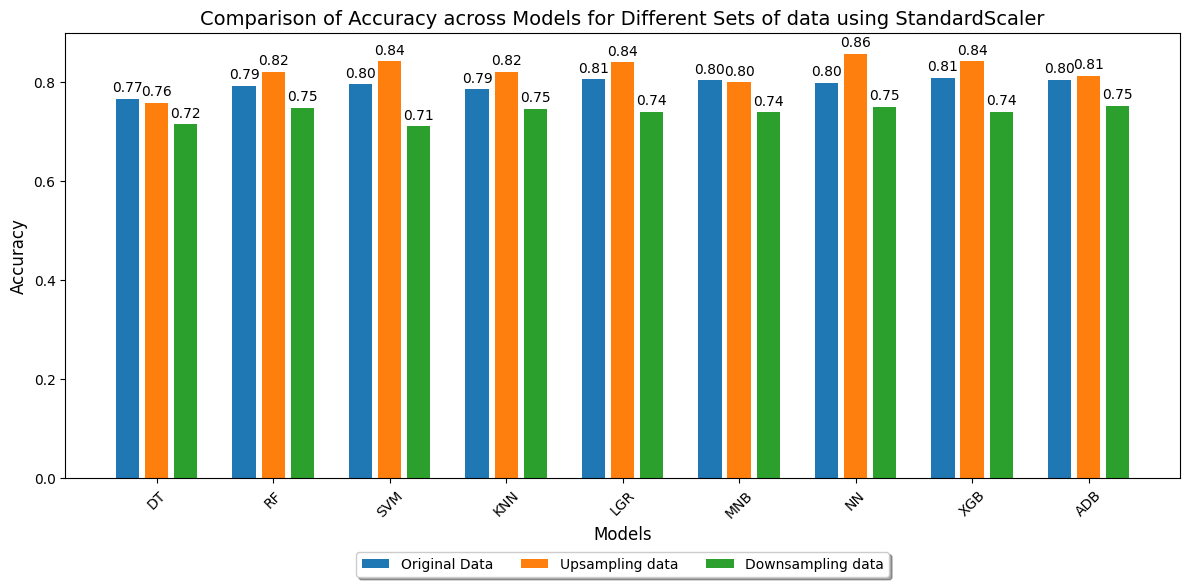

In [ ]:
std_accuracy = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': accuracy2,
    'Set 2': accuracy4,
    'Set 3': accuracy6,
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, std_accuracy['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, std_accuracy['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, std_accuracy['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Accuracy across Models for Different Sets of data using StandardScaler', fontsize=14)
plt.xticks(index + bar_width , std_accuracy['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

##Precision

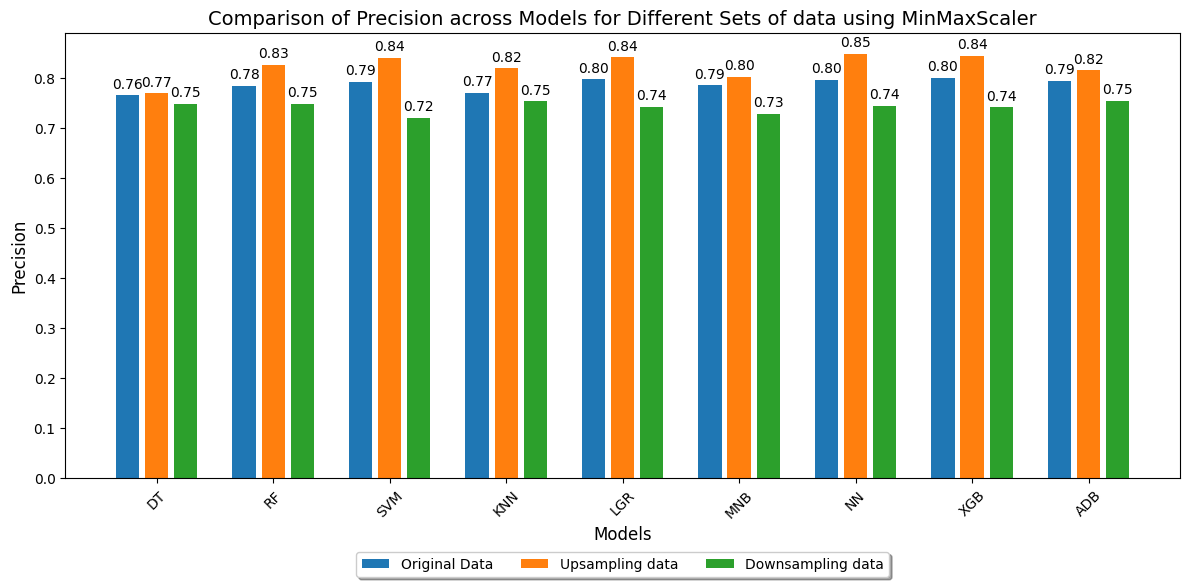

In [ ]:
mm_precision = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': precision1,
    'Set 2': precision3,
    'Set 3': precision5
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, mm_precision['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, mm_precision['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, mm_precision['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Comparison of Precision across Models for Different Sets of data using MinMaxScaler', fontsize=14)
plt.xticks(index + bar_width , mm_precision['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

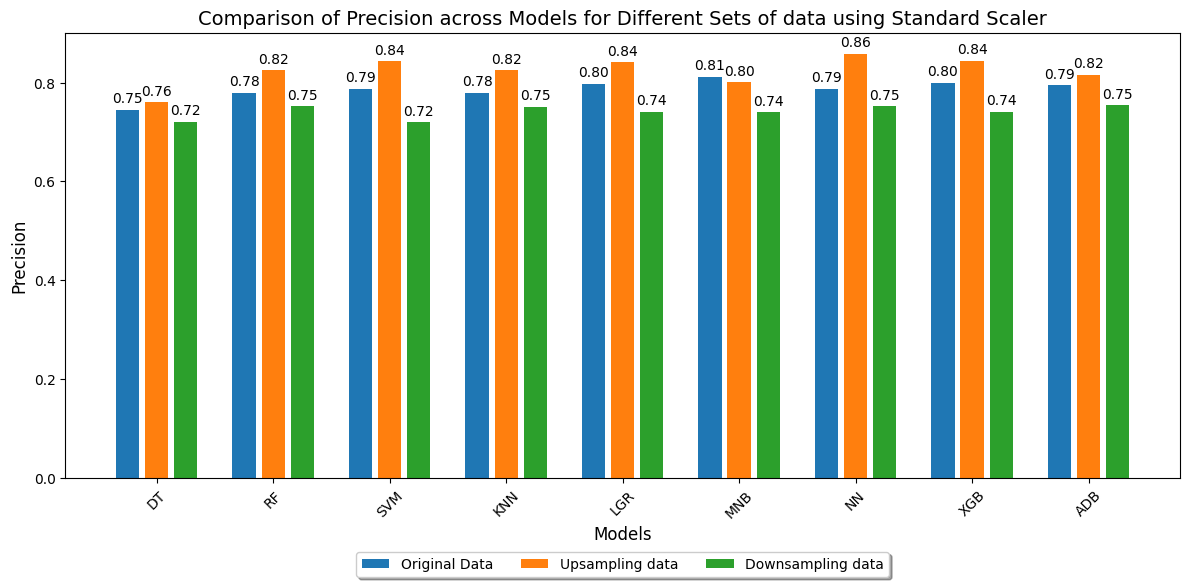

In [ ]:
std_precision = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': precision2,
    'Set 2': precision4,
    'Set 3': precision6
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, std_precision['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, std_precision['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, std_precision['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Comparison of Precision across Models for Different Sets of data using Standard Scaler', fontsize=14)
plt.xticks(index + bar_width , std_precision['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

##Recall

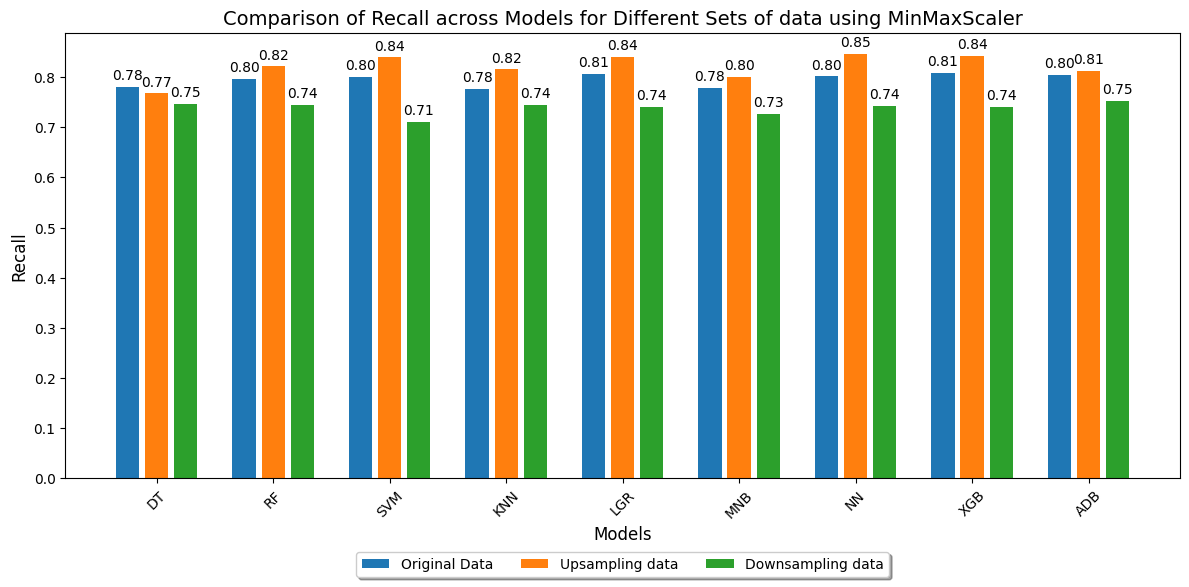

In [ ]:
mm_recall = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': recall1,
    'Set 2': recall3,
    'Set 3': recall5
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, mm_recall['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, mm_recall['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, mm_recall['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Comparison of Recall across Models for Different Sets of data using MinMaxScaler', fontsize=14)
plt.xticks(index + bar_width , mm_recall['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

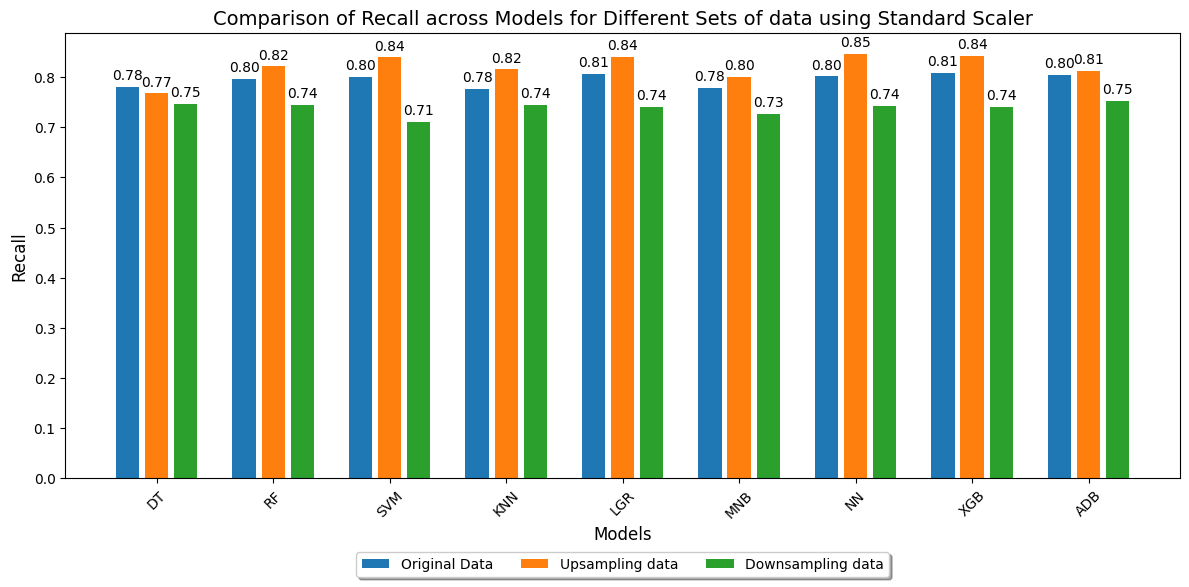

In [ ]:
std_recall = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': recall2,
    'Set 2': recall4,
    'Set 3': recall6
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, mm_recall['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, mm_recall['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, mm_recall['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Comparison of Recall across Models for Different Sets of data using Standard Scaler', fontsize=14)
plt.xticks(index + bar_width , mm_recall['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

##F1-Score

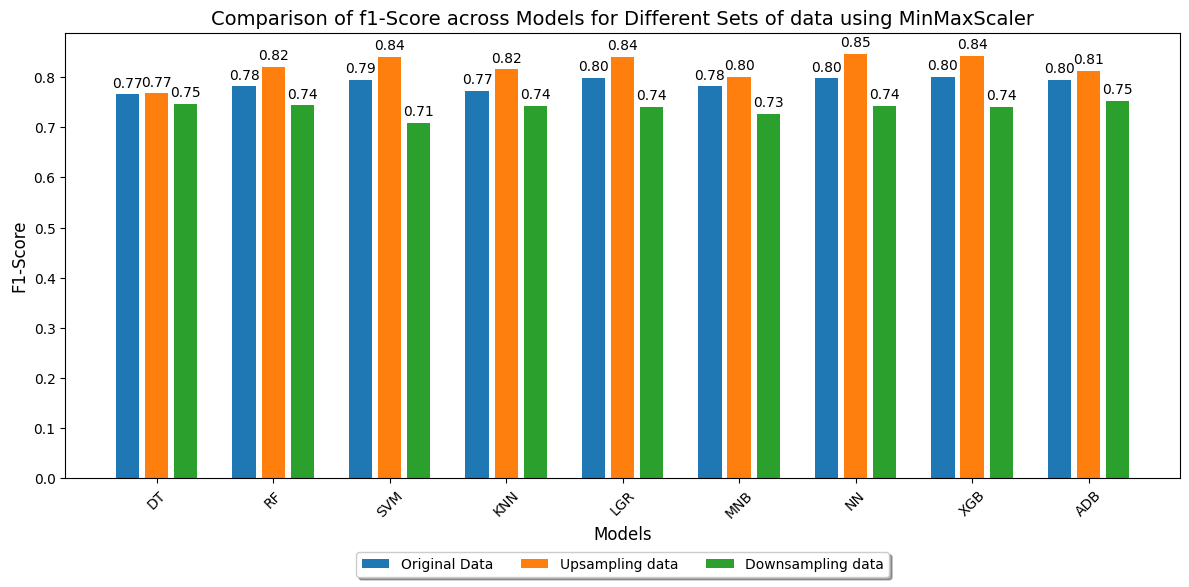

In [ ]:
mm_f1score = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': f1score1,
    'Set 2': f1score3,
    'Set 3': f1score5
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, mm_f1score['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, mm_f1score['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, mm_f1score['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('Comparison of f1-Score across Models for Different Sets of data using MinMaxScaler', fontsize=14)
plt.xticks(index + bar_width , mm_f1score['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

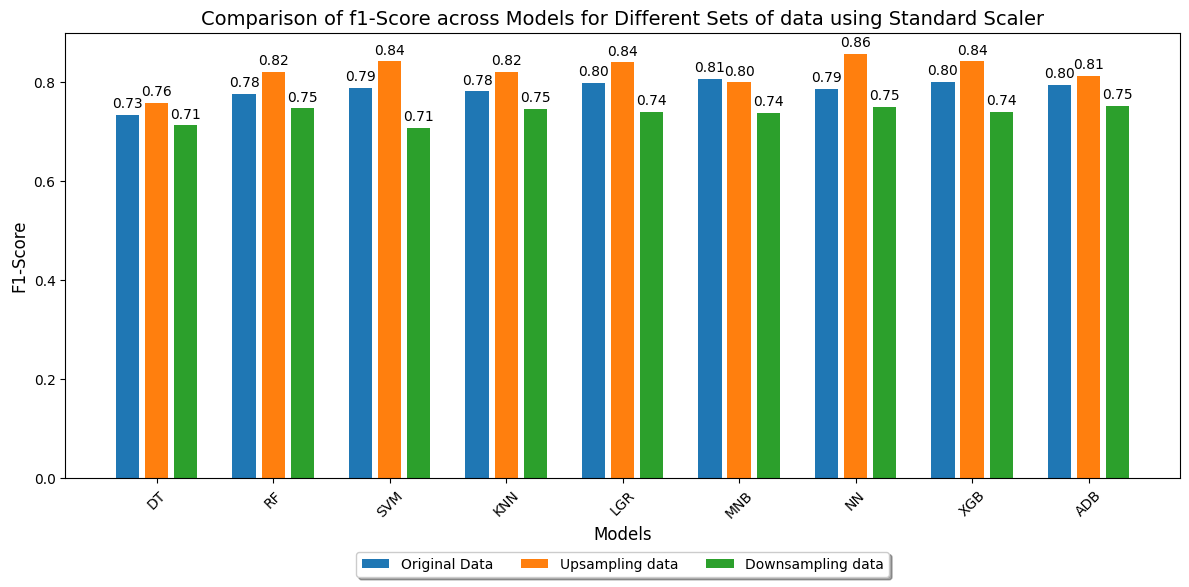

In [ ]:
std_f1score = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': f1score2,
    'Set 2': f1score4,
    'Set 3': f1score6
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, std_f1score['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, std_f1score['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, std_f1score['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.title('Comparison of f1-Score across Models for Different Sets of data using Standard Scaler', fontsize=14)
plt.xticks(index + bar_width , std_f1score['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

##AUC

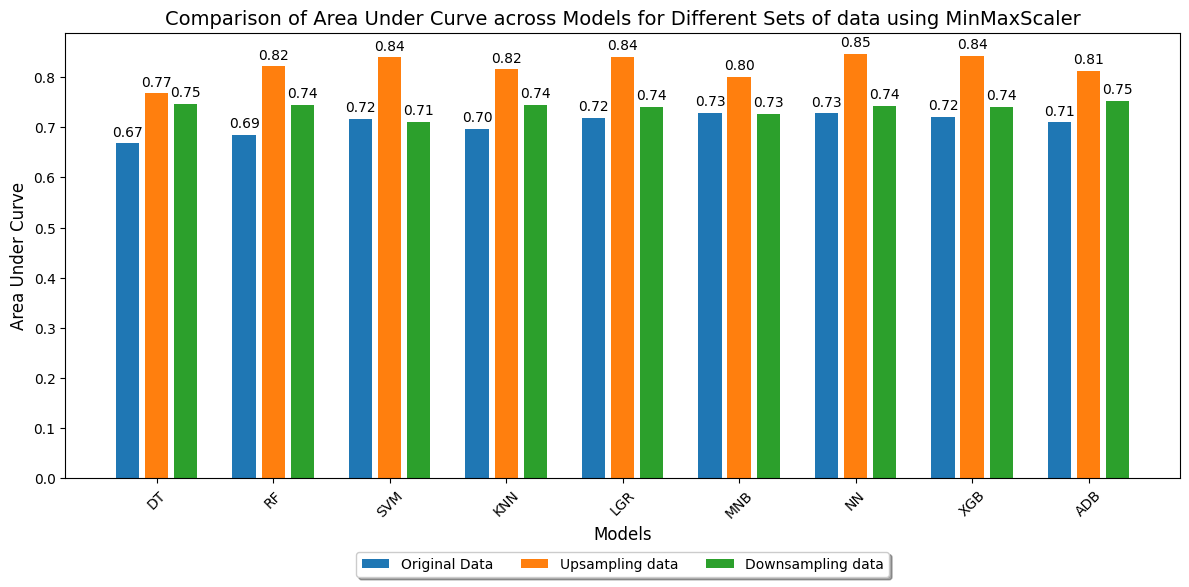

In [ ]:
mm_auc = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': auc1,
    'Set 2': auc3,
    'Set 3': auc5
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, mm_auc['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, mm_auc['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, mm_auc['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Area Under Curve', fontsize=12)
plt.title('Comparison of Area Under Curve across Models for Different Sets of data using MinMaxScaler', fontsize=14)
plt.xticks(index + bar_width , mm_auc['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

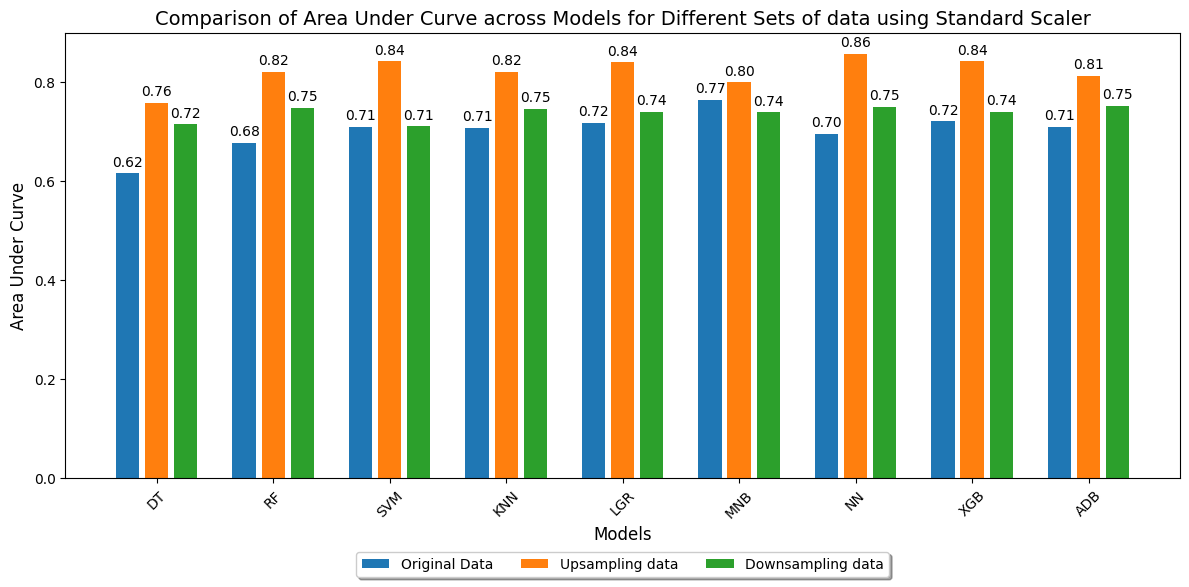

In [ ]:
std_auc = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': auc2,
    'Set 2': auc4,
    'Set 3': auc6
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, std_auc['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, std_auc['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, std_auc['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Area Under Curve', fontsize=12)
plt.title('Comparison of Area Under Curve across Models for Different Sets of data using Standard Scaler', fontsize=14)
plt.xticks(index + bar_width , std_auc['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Deployment

In [ ]:
import pickle
filename = 'trained_model.sav'
pickle.dump(usNormalised_trained_models['XGB'],open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.sav','rb'))